# Analytical solutions of leaf energy balance
Based on the following paper:
Schymanski, S.J. and Or, D. (2016): [Leaf-scale experiments reveal important omission in the Penman-Monteith equation.](http://www.hydrol-earth-syst-sci-discuss.net/hess-2016-363/) Hydrology and Earth System Sciences Discussions, p.1–33. doi: 10.5194/hess-2016-363.

Author: Stan Schymanski (stan.schymanski@env.ethz.ch)

This worksheet relies on definitions provided in Worksheets [Worksheet_setup](Worksheet_setup.ipynb) and [Leaf_enbalance_eqs](Leaf_enbalance_eqs.ipynb).

In [1]:
load('Worksheet_setup.sage')

/home/sschyman/Programs/sage-upgrade/local/lib/python2.7/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)


ipython nbconvert  --to=python './Worksheet_setup.ipynb'
Exporting Worksheet_setup.ipynb to .py file...


nbconvert returned 0


In [2]:
%%capture storage
# The above redirects all output of the below commands to the variable 'storage' instead of displaying it.
# It can be viewed by typing: 'storage()'
# Setting up worksheet and importing equations for explicit leaf energy balance
fun_include_ipynb('Leaf_enbalance_eqs', del1=False, output=True)

## Penman (1948)
In order to obtain analytical expressions for the different leaf energy balance components, one would need to solve the leaf energy balance equation for leaf temperature first. However, due to the non-linearities of the blackbody radiation and the saturation vapour pressure equations, an analytical solution has not been found yet. \citet{penman_natural_1948} proposed a work-around, which we reproduced below, adapted to our notation and to a wet leaf, while Penman's formulations referred to a wet soil surface. He formulated evaporation from a wet surface as a diffusive process driven by the vapour pressure difference near the wet surface and in the free air:
##### {eq_Ew_fu}
$$E_{w} = f_u (P_{wl} - P_{wa})$$

where $E_w$ (J~s$^{-1}$~m$^{-2}$) is the latent heat flux from a wet surface and $f_u$ is commonly referred to as the wind function. Penman then defined the Bowen ratio as (Eq. 10 in \citet{penman_natural_1948}):
##### {eq_beta_B}
$$\beta_B = H_l/E_w = \gamma_v \frac{T_l - T_a}{P_{wl} - P_{wa}}$$

where $H_l$ is the sensible heat flux and $\gamma_v$ is the psychrometric constant, referring to the ratio between the transfer coefficients for sensible heat and that for water vapour.

In [3]:
eq_Ew_fu = E_w == f_u*(P_wl - P_wa)
units_check(eq_Ew_fu).simplify_full()

E_w == -(P_wa - P_wl)*f_u

kilogram/second^3 == kilogram/second^3

In [4]:
eq_beta_B = beta_B == gamma_v*(T_l - T_a)/(P_wl - P_wa)
units_check(eq_beta_B).full_simplify()

beta_B == (T_a - T_l)*gamma_v/(P_wa - P_wl)

1 == 1

In order to eliminate $T_l$, Penman introduced a term for the ratio of the vapour pressure difference between the surface and the saturation vapour pressure at air temperature ($P_{was}$) to the temperature difference between the surface and the air:
##### {eq_Penman_ass}
$$ \Delta_{eTa} = \frac{P_{wl} - P_{was}}{T_l - T_a}$$

and he proposed to approximate this term by the slope of the saturation vapour pressure curve evaluated at air temperature, which can be obtained by substitution of $T_a$ for $T_l$ and differentiation of Eq. eq_Pwl with respect to $T_a$:
##### {eq_Deltaeta_Ta}
$$\Delta_{eTa} = \frac{611 \lambda_E M_w \exp \left( \frac{\lambda_E M_w}{R_{mol}} \left( \frac{1}{273} - \frac{1}{T_a} \right) \right)}{R_{mol} T_a^2}$$

For further discussion of the meaning of this assumption, please refer to \citet{mallick_surface_2014}.

In [5]:
eq_Penman_ass = Delta_eTa == (P_wl - P_was)/(T_l - T_a)
units_check(eq_Penman_ass).simplify_full()

Delta_eTa == (P_was - P_wl)/(T_a - T_l)

kilogram/(kelvin*meter*second^2) == kilogram/(kelvin*meter*second^2)

In [6]:
eq_Pwas_Ta = P_was == eq_Pwl.rhs()(T_l = T_a)
eq_Pwas_Ta.show()

P_was == 611*e^(-1/273*M_w*lambda_E*(273/T_a - 1)/R_mol)

In [7]:
eq_Deltaeta_T = Delta_eTa == diff(eq_Pwl.rhs()(T_l = T_a), T_a)
show(eq_Deltaeta_T)

Delta_eTa == 611*M_w*lambda_E*e^(-1/273*M_w*lambda_E*(273/T_a - 1)/R_mol)/(R_mol*T_a^2)

Susbstitution of Eq. {eq_Penman_ass} in Eq. {eq_beta_B} yields (Eq. 15 in \citet{bowen_ratio_1926}):
##### {eq_betaB_Pwas}
$$\beta_B = \frac{\gamma_v}{\Delta_{eTa}}\frac{(P_{wl} - P_{was})}{(P_{wl} - P_{wa})}$$

Substituting $E_w$ for $E_l$ and inserting $H_l = \beta_B E_w$ (Eq. {eq_beta_B}) into the energy balance equation (Eq. {eq_Rs_enbal}) and solving for $E_w$ gives:
##### {eq_Ew_betaB}
$$E_w = \frac{R_s - R_{ll}}{\beta_B + 1}$$

Substitution of Eq. {eq_betaB_Pwas} into Eq. {eq_Ew_betaB}, equating with Eq. {eq_Ew_fu} and solving for $P_{wl}$ gives:
##### {eq_Pwl_fu}
$$P_{wl} = \frac{f_u (\Delta_{eTa} P_{wa} + \gamma_v P_{was}) + \Delta_{eTa} (R_s - R_{ll})}
{f_u (\Delta_{eTa} + \gamma_v)}$$

Now, insertion of Eq. {eq_Pwl_fu} into Eq. {eq_Ew_fu} gives the so-called "Penman equation" :
##### {eq_Ew_P}
$$E_w = \frac{\Delta_{eTa}(R_s - R_{ll}) + f_u \gamma_v (P_{was} - P_{wa})}
{\Delta_{eTa} + \gamma_v}$$


Eq. {eq_Ew_P} is equivalent to Eq 16 in \citet{penman_natural_1948}, but Eq. 17 in \citet{penman_natural_1948}, which should be equivalent to Eq. {eq_Pwl_fu}, has $P_{wl}$ ($e_s$ in Penman's notation) on both sides, so it seems to contain an error. In his derivations, Penman expressed $R_s - R_{ll}$ as "net radiant energy available at surface" and pointed out that the above two equations can be used to estimate $E_l$ and $T_l$ from air conditions only. This neglects the fact that $R_{ll}$ is also a function of the leaf temperature. To estimate surface temperature, Eq. {eq_Pwl_fu} can be inserted into Eq. {eq_Penman_ass} and solved for $T_l$, yielding:
##### {eq_Tl_P}
$$T_l = \frac{R_s - R_{ll} + f_u (\gamma_v T_a + \Delta_{eTa} T_a + P_{wa} - P_{was})}{f_u(\gamma_v + \Delta_{eTa})}$$


In [8]:
soln = solve([eq_beta_B, eq_Penman_ass], beta_B, T_l)
eq_betaB_Pwas =  soln[0][0].factor()
units_check(eq_betaB_Pwas).simplify_full()

beta_B == (P_was - P_wl)*gamma_v/(Delta_eTa*(P_wa - P_wl))

1 == 1

In [9]:
eq_Ew_betaB = solve(eq_Rs_enbal(E_l = E_w, H_l = beta_B*E_w), E_w)[0]
units_check(eq_Ew_betaB).simplify_full()

E_w == -(R_ll - R_s)/(beta_B + 1)

kilogram/second^3 == kilogram/second^3

In [10]:
soln = solve([eq_betaB_Pwas, eq_Ew_betaB, eq_Ew_fu], P_wl, E_w, beta_B)
print soln
eq_Pwl_fu = soln[0][0].factor()
eq_Ew_P = soln[0][1]
units_check(eq_Pwl_fu)
units_check(eq_Ew_P)

[
[P_wl == (Delta_eTa*P_wa*f_u + P_was*f_u*gamma_v - Delta_eTa*R_ll + Delta_eTa*R_s)/(Delta_eTa*f_u + f_u*gamma_v), E_w == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)/(Delta_eTa + gamma_v), beta_B == -((P_wa - P_was)*f_u - R_ll + R_s)*gamma_v/((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)]
]


P_wl == (Delta_eTa*P_wa*f_u + P_was*f_u*gamma_v - Delta_eTa*R_ll + Delta_eTa*R_s)/((Delta_eTa + gamma_v)*f_u)

E_w == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)/(Delta_eTa + gamma_v)

kilogram/second^3 == kilogram/second^3

In [11]:
soln = solve(eq_Penman_ass.subs(eq_Pwl_fu), T_l)
eq_Tl_P = soln[0]
units_check(eq_Tl_P)

T_l == (T_a*f_u*gamma_v + (Delta_eTa*T_a + P_wa - P_was)*f_u - R_ll + R_s)/(Delta_eTa*f_u + f_u*gamma_v)

kelvin == kelvin

In [12]:
eq_Tl_P.subs(eq_Pwl(P_wl = P_was, T_l = T_a)).show()

T_l == (T_a*f_u*gamma_v + (Delta_eTa*T_a + P_wa - 611*e^(-1/273*M_w*lambda_E*(273/T_a - 1)/R_mol))*f_u - R_ll + R_s)/(Delta_eTa*f_u + f_u*gamma_v)

In [13]:
soln = solve([eq_Penman_ass, eq_Pwl_fu], T_l, P_wl)
#for eq in flatten(soln):
#    eq.show()
eq_Tl_P = soln[0][0]
print units_check(eq_Tl_P)
eq_Pwl_P_wet = soln[0][1]
units_check(eq_Pwl_P_wet)

T_l == ((Delta_eTa*f_u + f_u*gamma_v)*T_a + P_wa*f_u - P_was*f_u - R_ll + R_s)/(Delta_eTa*f_u + f_u*gamma_v)

kelvin == kelvin


P_wl == (P_was*f_u*gamma_v + (P_wa*f_u - R_ll + R_s)*Delta_eTa)/(Delta_eTa*f_u + f_u*gamma_v)

kilogram/(meter*second^2) == kilogram/(meter*second^2)

In [14]:
# Alternative approach to get T_l, followoing Eq. 17 in Penman (1948), which is eq_Pwl_P_wet
soln = solve(eq_Pwl.rhs() == eq_Pwl_P_wet.rhs(), T_l)
eq_Tl_P1 = soln[0].simplify_full()
show(eq_Tl_P1)

T_l == 273*M_w*lambda_E/(M_w*lambda_E + 273*R_mol*log(611*(Delta_eTa*f_u + f_u*gamma_v)/(Delta_eTa*P_wa*f_u + P_was*f_u*gamma_v - Delta_eTa*R_ll + Delta_eTa*R_s)))

## Introduction of stomatal resistance by \citet{penman_physical_1952}
To account for stomatal resistance to vapour diffusion, \citet{penman_physical_1952} introduced an additional multiplicator ($S$) in Eq. {eq_Ew_fu} \citep[Appendix 13]{penman_physical_1952}:
##### {eq_El_fu_S}
$$E_l = f_u S (P_{wl} - P_{wa})$$

where $S=1$ for a wet surface (leading to Eq. {eq_Ew_fu}) and $S<1$ in the presence of significant stomatal resistance. 

In accordance with Eqs. {eq_Ew_fu} and {eq_beta_B}, $H_l$ can be expressed as \citep[Appendix 13]{penman_physical_1952}:
##### {eq_Hl_Tl_P52}
$$H_l = \gamma_v f_u (T_l - T_a)$$

Substitution of Penman's simplifying assumption ($T_l - T_a = (P_{wl} - P_{was})/\Delta_{eT}$, Eq. {eq_Penman_ass}) is the first step to eliminating $T_l$:
##### {eq_Hl_Pwl_P52}
$$H_l = \frac{\gamma_v f_u (P_{wl} - P_{was})}{\Delta_{eTa}}$$

A series of algebraic manipulations involving Eqs. {eq_El_fu_S}, {eq_Hl_Pwl_P52} and {eq_Rs_enbal}  and the resulting Eq. {eq_El_P52} is given in \citet[Appendix 13]{penman_physical_1952}. When solving Eqs. {eq_El_fu_S}, {eq_Hl_Pwl_P52} and {eq_Rs_enbal} for $E_l$, $H_l$ and $P_{wl}$, we obtained:

##### {eq_El_P52}
$$E_l = \frac{S \Delta_{eTa}(R_s - R_{ll}) + S \gamma_v f_u (P_{was} - P_{wa})}{S \Delta_{eT} + \gamma_v}  $$

##### {eq_Hl_P52}
$$H_{l} = \frac{\gamma_{v} \left(R_s - {R_{ll}}\right) + S \gamma_{v} f_{u} \left({P_{wa}} - {P_{was}}\right)}
{S \Delta_{eTa} + \gamma_{v}}$$

##### {eq_Pwl_P52}
$$P_{wl} = \frac{\left(\Delta_{eTa}/f_u\right) \left(R_s - {R_{ll}}\right)+  \left({S \Delta_{eTa}} {P_{wa}} + \gamma_{v} {P_{was}}\right)}
{{S \Delta_{eTa}} + \gamma_{v}}$$
\end{equation}

In [15]:
eq_El_fu_S = E_l == f_u*S*(P_wl - P_wa)
units_check(eq_El_fu_S)

E_l == -(P_wa - P_wl)*S*f_u

kilogram/second^3 == kilogram/second^3

In [16]:
eq_Hl_Tl_P52 = solve((H_l/E_w == eq_beta_B.rhs()).subs(eq_Ew_fu), H_l)[0]
units_check(eq_Hl_Tl_P52)

H_l == -(T_a - T_l)*f_u*gamma_v

kilogram/second^3 == kilogram/second^3

In [17]:
soln = solve([eq_Hl_Tl_P52, eq_Penman_ass], H_l, T_l)
for eq in flatten(soln):
    eq.show()
eq_Hl_Pwl_P52 = soln[0][0]
units_check(eq_Hl_Pwl_P52)

H_l == -(P_was - P_wl)*f_u*gamma_v/Delta_eTa

T_l == (Delta_eTa*T_a - P_was + P_wl)/Delta_eTa

H_l == -(P_was - P_wl)*f_u*gamma_v/Delta_eTa

kilogram/second^3 == kilogram/second^3

In [18]:
soln = solve([eq_Hl_Pwl_P52,eq_El_fu_S, eq_Rs_enbal], E_l, H_l, P_wl)
[eq_El_P52, eq_Hl_P52, eq_Pwl_P52] = flatten(soln)
for eq in flatten(soln):
    print units_check(eq)

E_l == -(Delta_eTa*(R_ll - R_s)*S + (P_wa*S - P_was*S)*f_u*gamma_v)/(Delta_eTa*S + gamma_v)

kilogram/second^3 == kilogram/second^3


H_l == ((P_wa*S - P_was*S)*f_u - R_ll + R_s)*gamma_v/(Delta_eTa*S + gamma_v)

kilogram/second^3 == kilogram/second^3


P_wl == (Delta_eTa*P_wa*S*f_u + P_was*f_u*gamma_v - Delta_eTa*(R_ll - R_s))/(Delta_eTa*S*f_u + f_u*gamma_v)

kilogram/(meter*second^2) == kilogram/(meter*second^2)


### Analytical solutions for leaf temperature, $f_u$, $\gamma_v$ and $S$

Equation {eq_Pwl_P52} can be inserted into Eq. {eq_Penman_ass} and solved for leaf temperature to yield:
##### {eq_Tl_p52}
$$T_{l} = T_{a} + \frac{R_{s} - R_{ll} - S f_{u}(P_{was}-P_{wa})}
{f_{u} \left(S \Delta_{eT} + \gamma_{v}\right) }$$


\citet{penman_physical_1952} proposed to obtain values of $f_u$ and $S$ for a plant canopy empirically and described ways how to do this. However, for a single leaf, $f_u$ and $S$ could also be obtained analytically from our detailed mass and heat transfer model. 

Comparison of Eq. {eq_El_fu_S} with Eq. {eq_Elmol_conv} (after substituting Eq. {eq_El}) reveals that $S$ is equivalent to:
##### {eq_S_gtwmol_fu}
$$S = \frac{M_{w} g_{tw,mol} \lambda_{E}}{P_{a} f_{u}}$$

where $f_u$ was defined by \citet{penman_natural_1948} as the transfer coeffient for wet surface evaporation, i.e. a function of the boundary layer conductance only. 

To find a solution for $f_u$, we first formulate $E_w$ as transpiration from a leaf where $g_{tw} = g_{bw}$, using Eqs. {eq_El}, {eq_Elmol_conv} and {eq_gtwmol_gtw_iso}:
##### {eq_Ew_conv}
$$E_w = \frac{\lambda_E M_w g_{bw}}{R_{mol} T_a} (P_{wl} - P_{wa})$$

Comparison of Eq. {eq_Ew_conv} with {eq_Ew_fu} gives $f_u$ as a function of $g_{bw}$:
##### {eq_fu_gbw}
$$f_u = g_{bw}\frac{\lambda_E M_w}{R_{mol} T_a}$$

Comparison between Eq. {eq_Hl_Tl_P52} and Eq. {eq_Hl} reveals that
##### {eq_gammav_hc_fu}
$$\gamma_v = \frac{a_{sh} h_c}{f_u},$$

and insertion of Eqs. {eq_fu_gbw} and {eq_gbw_hc} give $\gamma_v$ as a function of $a_{sh}$ and $a_s$:
##### {eq_gammav_as}
$$\gamma_{v} =a_{sh}/a_s \frac{{N_{Le}}^{\frac{2}{3}} {R_{mol}} T_{a} \rho_{a} c_{pa}}{\lambda_{E} M_{w}}$$

Now, we can insert Eqs. {eq_fu_gbw}, {eq_gtwmol_gtw_iso} and {eq_gtw} into Eq. {eq_S_gtwmol_fu} to obtain $S$ as a function of $g_{sw}$ and $g_{bw}$:
##### {eq_S_gsw_gbw}
$$S = \frac{g_{sw}}{g_{bw} + g_{sw}}$$

The above equation illustrates that $S$ is not just a function of stomatal conductance, but also the leaf boundary layer conductance, explaining why \citet{penman_physical_1952} found that $S$ depends on wind speed.

In [19]:
soln = solve([eq_Penman_ass, eq_Pwl_P52], T_l, P_wl)
eq_Tl_P52 = soln[0][0]
latex(eq_Tl_P52)
units_check(eq_Tl_P52)

T_l == (P_wa*S*f_u - P_was*S*f_u + (Delta_eTa*S*f_u + f_u*gamma_v)*T_a - R_ll + R_s)/(Delta_eTa*S*f_u + f_u*gamma_v)

kelvin == kelvin

In [20]:
eq_S_gtwmol_fu = solve([eq_El_fu_S.subs(eq_El), eq_Elmol_conv], S, E_lmol)[0][0]
units_check(eq_S_gtwmol_fu)

S == M_w*g_twmol*lambda_E/(P_a*f_u)

1 == 1

In [21]:
eq_Hl_Tl_P52.show()

H_l == -(T_a - T_l)*f_u*gamma_v

In [22]:
eq_Hl.show()

H_l == -(T_a - T_l)*a_sh*h_c

In [23]:
eq_gammav_hc_fu = solve(eq_Hl_Tl_P52.rhs() == eq_Hl.rhs(), gamma_v)[0]
units_check(eq_gammav_hc_fu)

gamma_v == a_sh*h_c/f_u

kilogram/(kelvin*meter*second^2) == kilogram/(kelvin*meter*second^2)

In [24]:
eq_El_fu_S.show()

E_l == -(P_wa - P_wl)*S*f_u

In [25]:
eq_Ew_conv = eq_El.subs(eq_Elmol_conv).subs(eq_gtwmol_gtw_iso)(g_tw = g_bw, E_l = E_w)
units_check(eq_Ew_conv)

E_w == -M_w*(P_wa - P_wl)*g_bw*lambda_E/(R_mol*T_a)

kilogram/second^3 == kilogram/second^3

In [26]:
eq_fu_gbw = solve(eq_Ew_conv.rhs() == eq_Ew_fu.rhs(), f_u)[0]
units_check(eq_fu_gbw)

f_u == M_w*g_bw*lambda_E/(R_mol*T_a)

meter/second == meter/second

In [27]:
eq_gammav_hc_fu = solve(eq_Hl_Tl_P52.rhs() == eq_Hl.rhs(), gamma_v)[0]
units_check(eq_gammav_hc_fu)

gamma_v == a_sh*h_c/f_u

kilogram/(kelvin*meter*second^2) == kilogram/(kelvin*meter*second^2)

In [28]:
eq_gammav_as = eq_gammav_hc_fu.subs(eq_fu_gbw).subs(eq_gbw_hc)
units_check(eq_gammav_as)

gamma_v == Le^(2/3)*R_mol*T_a*a_sh*c_pa*rho_a/(M_w*a_s*lambda_E)

kilogram/(kelvin*meter*second^2) == kilogram/(kelvin*meter*second^2)

In [29]:
eq_S_gbw_gsw = eq_S_gtwmol_fu.subs(eq_fu_gbw).subs(eq_gtwmol_gtw_iso).subs(eq_gtw).simplify_full()
units_check(eq_S_gbw_gsw)

S == g_sw/(g_bw + g_sw)

1 == 1

In [30]:
eq_El_P52.subs(eq_S_gbw_gsw, eq_fu_gbw).subs(g_bw = 1/r_bw, g_sw = 1/r_sw).simplify_full().show()

E_l == -((M_w*P_wa - M_w*P_was)*gamma_v*lambda_E + (Delta_eTa*R_ll*R_mol - Delta_eTa*R_mol*R_s)*T_a*r_bw)/(R_mol*T_a*gamma_v*r_sw + (Delta_eTa*R_mol*T_a + R_mol*T_a*gamma_v)*r_bw)

In [31]:
eq_El_P52.subs(eq_S_gbw_gsw, eq_fu_gbw).subs(eq_gammav_as).simplify_full().show()

E_l == -((M_w*P_wa - M_w*P_was)*Le^(2/3)*a_sh*c_pa*g_bw*g_sw*lambda_E*rho_a + (Delta_eTa*M_w*R_ll - Delta_eTa*M_w*R_s)*a_s*g_sw*lambda_E)/(Delta_eTa*M_w*a_s*g_sw*lambda_E + (R_mol*T_a*a_sh*c_pa*g_bw + R_mol*T_a*a_sh*c_pa*g_sw)*Le^(2/3)*rho_a)

In [32]:
eq_El_P52.subs(eq_S_gbw_gsw, eq_fu_gbw).subs(g_sw = 1/r_sw, g_bw = 1/r_bw).simplify_full().show()

E_l == -((M_w*P_wa - M_w*P_was)*gamma_v*lambda_E + (Delta_eTa*R_ll*R_mol - Delta_eTa*R_mol*R_s)*T_a*r_bw)/(R_mol*T_a*gamma_v*r_sw + (Delta_eTa*R_mol*T_a + R_mol*T_a*gamma_v)*r_bw)

In [33]:
eq_El_P52.subs(eq_S_gbw_gsw, eq_fu_gbw).subs(g_sw = 1/r_sw, g_bw = 1/r_bw).subs(eq_gammav_as).simplify_full().show()

E_l == -((M_w*P_wa - M_w*P_was)*Le^(2/3)*a_sh*c_pa*lambda_E*rho_a + (Delta_eTa*M_w*R_ll - Delta_eTa*M_w*R_s)*a_s*lambda_E*r_bw)/(Delta_eTa*M_w*a_s*lambda_E*r_bw + (R_mol*T_a*a_sh*c_pa*r_bw + R_mol*T_a*a_sh*c_pa*r_sw)*Le^(2/3)*rho_a)

In [34]:
eq_El_P52.subs(eq_S_gbw_gsw, eq_fu_gbw, eq_gammav_as).simplify_full().show()

E_l == -((M_w*P_wa - M_w*P_was)*Le^(2/3)*a_sh*c_pa*g_bw*g_sw*lambda_E*rho_a + (Delta_eTa*M_w*R_ll - Delta_eTa*M_w*R_s)*a_s*g_sw*lambda_E)/(Delta_eTa*M_w*a_s*g_sw*lambda_E + (R_mol*T_a*a_sh*c_pa*g_bw + R_mol*T_a*a_sh*c_pa*g_sw)*Le^(2/3)*rho_a)

## Penman-Monteith equation
\citet{monteith_evaporation_1965} re-derived Eq. {eq_Ew_P} using a  different set of arguments than Penman in his original derivation and arrived to an equivalent equation (Eq. 8 in \citet{monteith_evaporation_1965}):
##### {eq_Ew_PM1}
$$E_w = \frac{\Delta_{eTa}(R_s - R_{ll}) + \rho_a c_{pa} (P_{was} - P_{wa})/r_a}
{\Delta_{eTa} + \gamma_v} ,$$

where $r_a$ is the leaf boundary layer resistance to sensible heat flux.
Eq. {eq_Ew_PM1} is consistent with Eq. {eq_Ew_P} if Penman's wind function ($f_u$) is replaced by:
##### {eq_fu_ra_M}
$$f_u = \frac{\rho_a c_{pa}}{\gamma_v r_a}.$$


Monteith pointed out that the ratio between the conductance to sensible heat and the conductance to water vapour transfer, expressed in the psychrometric constant ($\gamma_v$) would be affected by stomatal resistance ($r_{sw}$) and hence proposed to replace the psychrometric constant by $\gamma_v^*$:
##### {eq_gammavs_M65}
$$\gamma_v^* = \gamma_v(1 + \frac{r_s}{r_a}),$$

leading to the so-called Penman-Monteith equation for transpiration:
##### {eq_El_PM2}
$$E_l = \frac{\Delta_{eTa}(R_s - R_{ll}) + \rho_a c_{pa} (P_{was} - P_{wa})/r_a}
{\Delta_{eTa} + \gamma_v \left(1 + \frac{r_{s}}{r_a}\right)} $$


More recently, \citet{monteith_principles_2013} pointed out that the difference between leaves with stomata on only one side and those with stomata on both sides can also be considered by further modifying $\gamma_v^*$ to:
##### {eq_gammavs_MU}
$$\gamma_v^* = n_{MU} \gamma_v (1 + r_s/r_a)$$

where $n_{MU} = 1$ for leaves with stomata on both sides and $n_{MU} = 2$ for leaves with stomata on one side, i.e. $n_{MU} = a_{sh}/a_s$ in our notation.
Insertion of Eq. {eq_gammavs_MU} into Eq. {eq_Ew_PM1} yields what we will call the Monteith-Unsworth (MU) equation, which only differs from the Penman-Monteith equation by the additional factor $n_{MU}$:
##### {eq_El_MU2}
$$E_l = \frac{\Delta_{eTa}(R_s - R_{ll}) + \rho_a c_{pa} (P_{was} - P_{wa})/r_a}
{\Delta_{eTa} + \gamma_v n_{MU} \left(1 + \frac{r_{s}}{r_a}\right)} $$

\citet{monteith_principles_2013} also provide a definition of $\gamma_v$ as:
##### {eq_gammav_MU}
$$\gamma_v = \frac{c_{pa} P_a}{\lambda_E \epsilon}$$

where $\epsilon$ is the ratio of molecular weights of water vapour and air (given by \citet{monteith_principles_2013} as 0.622). 
Note that Equation {eq_gammavs_MU} was derived based on the assumption that $r_a$ refers to one-sided resistance to sensible heat transfer \citep[P. 231]{monteith_principles_2013}, but $r_a$ in Eq. {eq_Ew_PM1} refers to total leaf boundary layer resistance for sensible heat flux, which, for a planar leaf, is half the one-sided value. This inconsistency will be further discussed in Section {sec_PM-incons}.

The molar mass of air is $M_a = \rho_a V_a/n_a$, while according to the ideal gas law, $V_a/n_a = R_{mol} T_a/P_a$, which yields for $\epsilon = M_w/M_a$:
##### {eq_epsilon}
$$\epsilon = \frac{M_w P_a}{R_{mol} T_a \rho_a}$$

Inserting Eqs. {eq_rhoa_Pwa_Ta}, {eq_PN2} and {eq_PO2} in the above, $T_a$ cancels out, and at standard atmospheric pressure of 101325 Pa, we obtain values for $\epsilon$ between 0.624 and 0.631 for vapour pressure ranging from 0 to 3000 Pa, compared to the value of 0.622 mentioned by \citet{monteith_principles_2013}.

In [35]:
eq_fu_ra_M = f_u == rho_a*c_pa/(gamma_v*r_a)
units_check(eq_fu_ra_M)

f_u == c_pa*rho_a/(gamma_v*r_a)

meter/second == meter/second

In [36]:
eq_Ew_PM1 = eq_Ew_P.subs(eq_fu_ra_M)
units_check(eq_Ew_PM1)

E_w == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(Delta_eTa + gamma_v)

kilogram/second^3 == kilogram/second^3

In [37]:
eq_gammavs_M65 = gamma_v == gamma_v*(1 + r_s/r_a)
units_check(eq_gammavs_M65)

gamma_v == gamma_v*(r_s/r_a + 1)

kilogram/(kelvin*meter*second^2) == kilogram/(kelvin*meter*second^2)

In [38]:
eq_El_PM2 = eq_Ew_PM1.subs(eq_gammavs_M65)(E_w = E_l)
units_check(eq_El_PM2)

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*(r_s/r_a + 1) + Delta_eTa)

kilogram/second^3 == kilogram/second^3

In [39]:
eq_gammavs_MU = gamma_v == n_MU*gamma_v*(1 + r_s/r_a)
units_check(eq_gammavs_MU)

gamma_v == gamma_v*n_MU*(r_s/r_a + 1)

kilogram/(kelvin*meter*second^2) == kilogram/(kelvin*meter*second^2)

In [40]:
eq_El_MU2 = eq_Ew_PM1.subs(eq_gammavs_MU)(E_w = E_l)
units_check(eq_El_MU2)

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*n_MU*(r_s/r_a + 1) + Delta_eTa)

kilogram/second^3 == kilogram/second^3

In [41]:
eq_gammav_MU = gamma_v == c_pa*P_a/(lambda_E*epsilon)
units_check(eq_gammav_MU)

gamma_v == P_a*c_pa/(epsilon*lambda_E)

kilogram/(kelvin*meter*second^2) == kilogram/(kelvin*meter*second^2)

In [42]:
# Molar mass of air is M_a = rho_a*V_a/n_a, while V_a/n_a = R_mol*T_a/P_a, according to the ideal gas law
eq_epsilon = epsilon == M_w/(rho_a*R_mol*T_a/P_a)
units_check(eq_epsilon)

epsilon == M_w*P_a/(R_mol*T_a*rho_a)

1 == 1

epsilon == 100*M_w*P_a/(79*M_N2*(P_a - P_wa) + 21*M_O2*(P_a - P_wa) + 100*M_w*P_wa)

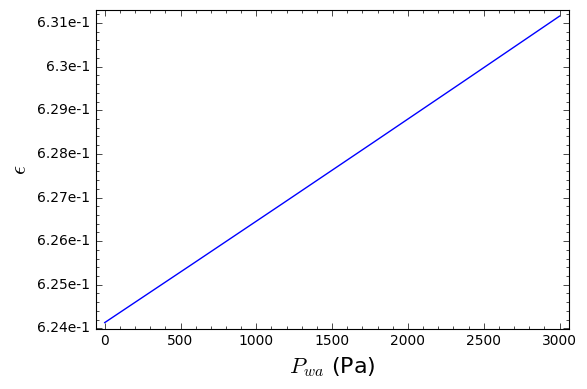

In [43]:
eq_epsilon.subs(eq_rhoa).show()
P = plot(eq_epsilon.rhs().subs(eq_rhoa).subs(cdict)(P_a = 101325), (P_wa, 0, 3000))
P.axes_labels(['$P_{wa}$ (Pa)', '$\epsilon$'])
P

### Relationships between resistances and conductances
As opposed to the formulations in Section {sec:enbal}, where sensible and latent heat transfer coefficients ($h_c$ and $g_{tw}$ respectively) translate leaf-air differences in temperature or vapour concentration to fluxes, resistances in the PM equation are defined in the context of \citep[Eqs. 13.16 and 13.20]{monteith_principles_2013}:
##### {eq_El_MU}
\begin{equation}
E_l = \frac{a_s \lambda_E\rho_a\epsilon}{P_a (r_v + r_s)} (P_{wl} - P_{wa})
\end{equation}
and 
##### {eq_Hl_MU}
\begin{equation}
H_l = \frac{a_{sh} \rho_a c_{pa}}{r_a}(T_l - T_a),
\end{equation}
where $r_v$ and $r_s$ are the one-sided leaf boundary layer and stomatal resistances to water vapour respectively, and $r_a$ is the one-sided leaf boundary layer resistance to sensible heat transfer. Note that the introduction of $a_s$, $a_{sh}$ and $r_s$ in Eqs. {eq_El_MU} and {eq_Hl_MU} is based on the description on P. 231 in \citet{monteith_principles_2013}, where the authors also assumed that $r_v \approx r_a$.

Comparison of Eq. {eq_El_MU} with Eq. {eq_Elmol} (after substitution of Eqs. {eq_Cwl} and {eq_Cwa} and insertion into Eq. {eq_El}), assuming isothermal conditions ($T_l = T_a$) and substituting Eq. {eq_epsilon} reveals that 
##### {eq_rv_gbw}
\begin{equation}
r_v = a_s/g_{bw},
\end{equation}
while comparison of Eq. {eq_Hl_MU} with Eq. {eq_Hl} reveals that
##### {eq_ra_hc}
\begin{equation}
r_a = \frac{\rho_a c_{pa}}{h_c}.
\end{equation}

In [44]:
# According to Eq. 13.20 in Monteith_principles_2013, rho_a*c_pa/r_H = h_c, while he states below Eq. 13.32 that r_H = r_v approximately. This would imply that g_bw = 1/r_w = h_c/(rho_a*c_pa). Is this true?
eq_Hl.show()
vdict[h_c] = h_c
(eq_gbw_hc/(rho_a*c_pa)).subs(eq_rhoa_Pwa_Ta, eq_Le).subs(eq_alphaa, eq_Dva,eq_PN2, eq_PO2).subs(vdict)
# However, note that r_v is used in Eq. 13.16 on the vapour pressure gradient, not on the concentration gradient as g_bw! He also uses E_l == lambda_E*rho_a*epsilon/P_a*(P_wl - P_wa)/r_v, when formulating the equation for a wet surface evaporating on one side only.
eq_Cwl

H_l == -(T_a - T_l)*a_sh*h_c

C_wl == P_wl/(R_mol*T_l)

In [45]:
eq_El_MU = E_l == a_s*lambda_E*rho_a*epsilon/(P_a*(r_v + r_s)) * (P_wl - P_wa)
print units_check(eq_El_MU)
eq_Hl_MU = H_l == a_sh*rho_a*c_pa/r_a*(T_l - T_a)
units_check(eq_Hl_MU)

E_l == -(P_wa - P_wl)*a_s*epsilon*lambda_E*rho_a/(P_a*(r_s + r_v))

kilogram/second^3 == kilogram/second^3


H_l == -(T_a - T_l)*a_sh*c_pa*rho_a/r_a

kilogram/second^3 == kilogram/second^3

In [46]:
eq_El.subs(eq_Elmol).subs(eq_Cwl, eq_Cwa).show()

E_l == -M_w*g_tw*lambda_E*(P_wa/(R_mol*T_a) - P_wl/(R_mol*T_l))

In [47]:
soln = solve([eq_El_MU(r_s = 0), eq_El.subs(eq_Elmol).subs(eq_Cwl, eq_Cwa)], r_v, E_l)
eq_rv_gbw = soln[0][0](T_l = T_a, g_tw = g_bw).subs(eq_epsilon).simplify_full()
units_check(eq_rv_gbw)

r_v == a_s/g_bw

second/meter == second/meter

<p><span style="color: #ff0000;">Note that according to eq_El_MU, $r_v$ is one-sided resistance, while according to eq_Elmol, $g_{bw}$ is total conductance. Therefore, for hypostomatous leaves, they are both one-sided, whereas for amphistomatous leaves, the one -sided resistance is twice $1/g_{bw}$.</span></p>

In [48]:
eq_El.subs(eq_Elmol).subs(eq_Cwl, eq_Cwa).show()
eq_El_MU.subs(eq_epsilon).show()

E_l == -M_w*g_tw*lambda_E*(P_wa/(R_mol*T_a) - P_wl/(R_mol*T_l))

E_l == -M_w*(P_wa - P_wl)*a_s*lambda_E/(R_mol*T_a*(r_s + r_v))

In [49]:
soln = solve([eq_El_MU(r_v = 0), eq_El.subs(eq_Elmol).subs(eq_Cwl, eq_Cwa)], r_s, E_l)
eq_rs_gsw = soln[0][0](T_l = T_a, g_tw = g_sw).subs(eq_epsilon).simplify_full()
units_check(eq_rs_gsw)

r_s == a_s/g_sw

second/meter == second/meter

In [50]:
soln = solve([eq_Hl_MU, eq_Hl], r_a, H_l)
eq_ra_hc = soln[0][0]
units_check(eq_ra_hc)

r_a == c_pa*rho_a/h_c

second/meter == second/meter

<p>...</p>

## Generalisation of Penman's analytical approach
The key point of Penman's analytical solution is to formulate $E_l$ as a function of ($P_{wl} - P_{wa}$) and $H_l$ as a function of ($T_l - T_a$). We will do this by introducing general transfer coefficients for latent heat ($c_E$, W~m$^{-2}$~Pa$^{1}$) and sensible heat ($c_H$, W~m$^{-2}$~K$^{1}$):
##### {eq_El_cE}
\begin{equation}
E_l = c_E (P_{wl} - P_{wa})
\end{equation}
##### {eq_Hl_cH}
\begin{equation}
H_l = c_H (T_l - T_a)
\end{equation}
We now define the psychrometric constant as
##### {eq_gammav_cE}
\begin{equation}
\gamma_v = c_H/c_E
\end{equation}
and introduce it into Eq. {eq_Hl_cH} to obtain:
##### {eq_Hl_gammav}
\begin{equation}
H_l = \gamma_v c_E (T_l - T_a)
\end{equation}
Introduction of the Penman assumption (Eq. {eq_Penman_ass}) allows elimination of leaf temperature:
##### {eq_Hl_Pwl}
\begin{equation}
H_l = \frac{c_E \gamma_v (P_{wl} - P_{was})}{\Delta_{eTa}}
\end{equation}
Eqs. {eq_El_cE}, {eq_Hl_Pwl} and the leaf energy balance equation (Eq. {eq_Rs_enbal}), form a system of three equations that can be solved for $E_l$, $H_l$ and $P_{wl}$ to yield:
##### {eq_El_Delta}
\begin{equation}
E_{l} = \frac{\Delta_{eTa} c_E
{\left({R_{s}} - R_{ll}\right) + c_E c_{H} \left({P_{was}} - {P_{wa}}\right) }
}
{\Delta_{eTa} c_E + c_H}
\end{equation} 
and
##### {eq_Hl_Delta}
\begin{equation}
H_{l} = \frac{
c_H \left(R_s - R_{ll} \right) + c_E c_H \left(P_{wa} - P_{was}\right)
} 
{\Delta_{eTa} c_E + c_H}
\end{equation} 
In the above, we already substituted Eq. {eq_gammav_cE} to avoid confusion about the meaning of $\gamma_v$, which is often referred to as the psychrometric constant, but in this case, it would strongly depend on stomatal resistance and hence should not be referred to as a constant. 

Eqs. {eq_Hl_Delta} and {eq_Hl_cH} can now be used to get an analytical solution for leaf temperature ($T_l$):
##### {eq_Tl_Delta}
\begin{equation}
T_{l} = T_a + \frac{
(R_s - R_{ll}) +  c_{E} ({P_{wa}} - P_{was}) 
}
{\Delta_{eTa} c_E + c_H}
\end{equation}
Instead of using Eqs. {eq_Hl_Delta} and {eq_El_Delta} directly, one might obtain alternative analytic solutions for $H_l$ and $E_l$ by inserting Eq. {eq_Tl_Delta} into Eq. {eq_Hl_cH} or into Eq. {eq_Pwl} and the latter into the aerdynamic formulation given in Eq. {eq_El_cE}. 

In the original formulations by Penman and Monteith, the term $R_s - R_{ll}$ is referred to as net available energy and for a ground surface it is represented by net radiation minus ground heat flux ($R_N - G$). For a leaf, there is no ground heat flux, and $R_N = R_s - R_{ll}$. In most applications of the analytical solutions, $R_{ll}$ is not explicitly calculated, but it is assumed that $R_N$ is known, neglecting the dependence of $R_{ll}$ on the leaf temperature. Use of Eq. {eq_Tl_Delta} to estimate steady-state leaf temperature and subsequent calculation of $H_l$ and $E_l$ as outlined above, has the advantage that missing information on $R_{ll}$ would not directly affect calculation of $H_l$ and $E_l$, but only through its effect on leaf temperature. In fact, using $T_l$ obtained from Eq. {eq_Tl_Delta} by assuming that $R_{ll} = 0$ would then enable approximate estimation of the true $R_{ll}$ by inserting $T_l$ into Eq. {eq_Rll}.

In [51]:
var2('c_E', 'Latent heat transfer coefficient', joule/second/meter^2/pascal)
var2('c_H', 'Sensible heat transfer coefficient', joule/second/meter^2/kelvin)

c_H

In [52]:
eq_El_cE = E_l == c_E*(P_wl - P_wa)
print units_check(eq_El_cE)
eq_Hl_cH = H_l == c_H*(T_l - T_a)
units_check(eq_Hl_cH)

E_l == -(P_wa - P_wl)*c_E

kilogram/second^3 == kilogram/second^3


H_l == -(T_a - T_l)*c_H

kilogram/second^3 == kilogram/second^3

In [53]:
# Introducing gamma_v = c_H/c_E into H_l
eq_gammav_cE = gamma_v == c_H/c_E 
eq_Hl_gammav = H_l == c_E*gamma_v*(T_l - T_a)
units_check(eq_Hl_gammav)

H_l == -(T_a - T_l)*c_E*gamma_v

kilogram/second^3 == kilogram/second^3

In [54]:
# Introducing the Penman-assumption to eliminate T_l
eq_Penman_ass.show()
soln = solve([eq_Hl_gammav, eq_Penman_ass], H_l, T_l)
#for eq in flatten(soln):
#    eq.show()
eq_Hl_Pwl = soln[0][0]
print units_check(eq_Hl_Pwl)

Delta_eTa == (P_was - P_wl)/(T_a - T_l)

H_l == -(P_was - P_wl)*c_E*gamma_v/Delta_eTa

kilogram/second^3 == kilogram/second^3


In [55]:
# Using energy balance to eliminate P_wl
soln = solve([eq_Hl_Pwl,eq_El_cE, eq_Rs_enbal], E_l, H_l, P_wl)
[eq_El_Delta, eq_Hl_Delta, eq_Pwl_Delta] = [eq1.subs(eq_gammav_cE).simplify_full() for eq1 in flatten(soln)]
for eq1 in [eq_El_Delta, eq_Hl_Delta, eq_Pwl_Delta]:
    print units_check(eq1)
    print latex(eq1)

E_l == -((P_wa - P_was)*c_E*c_H + (Delta_eTa*R_ll - Delta_eTa*R_s)*c_E)/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
E_{l} = -\frac{{\left({P_{wa}} - {P_{was}}\right)} c_{E} c_{H} + {\left({\Delta_{eTa}} {R_{ll}} - {\Delta_{eTa}} R_{s}\right)} c_{E}}{{\Delta_{eTa}} c_{E} + c_{H}}


H_l == ((P_wa - P_was)*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
H_{l} = \frac{{\left({\left({P_{wa}} - {P_{was}}\right)} c_{E} - {R_{ll}} + R_{s}\right)} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


P_wl == (Delta_eTa*P_wa*c_E - Delta_eTa*R_ll + Delta_eTa*R_s + P_was*c_H)/(Delta_eTa*c_E + c_H)

kilogram/(meter*second^2) == kilogram/(meter*second^2)
{P_{wl}} = \frac{{\Delta_{eTa}} {P_{wa}} c_{E} - {\Delta_{eTa}} {R_{ll}} + {\Delta_{eTa}} R_{s} + {P_{was}} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


In [56]:
# Solving for T_l
eq_Tl_Delta = solve(eq_Hl_Delta.rhs() == eq_Hl_cH.rhs(), T_l)[0].expand().factor()
print units_check(eq_Tl_Delta)
latex(eq_Tl_Delta)

T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

kelvin == kelvin


T_{l} = \frac{{\Delta_{eTa}} T_{a} c_{E} + {P_{wa}} c_{E} - {P_{was}} c_{E} + T_{a} c_{H} - {R_{ll}} + R_{s}}{{\Delta_{eTa}} c_{E} + c_{H}}

In [57]:
eq_Tl_Delta.expand().simplify_full().show()

T_l == ((Delta_eTa*T_a + P_wa - P_was)*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

In [58]:
# Test if formulation in paper is the same
eq_Tl_Delta1 = T_l == T_a + ((R_s - R_ll) + c_E*(P_wa - P_was))/(Delta_eTa*c_E + c_H)
eq_Tl_Delta1.show()
(eq_Tl_Delta.rhs() - eq_Tl_Delta1.rhs()).full_simplify()

T_l == T_a + ((P_wa - P_was)*c_E - R_ll + R_s)/(Delta_eTa*c_E + c_H)

0

In [59]:
# Alternative approach to get T_l
eq_Pwl.show()
soln = solve(eq_Pwl_Delta.rhs() == eq_Pwl.rhs(), T_l)
eq_Tl_Delta2 = soln[0].simplify_full()
eq_Tl_Delta2.show()

P_wl == 611*e^(-1/273*M_w*lambda_E*(273/T_l - 1)/R_mol)

T_l == 273*M_w*lambda_E/(M_w*lambda_E + 273*R_mol*log(611*(Delta_eTa*c_E + c_H)/(Delta_eTa*P_wa*c_E - Delta_eTa*R_ll + Delta_eTa*R_s + P_was*c_H)))

In [60]:
eq_El.subs(eq_Elmol_conv)

E_l == -M_w*(P_wa - P_wl)*g_twmol*lambda_E/P_a

In [61]:
eq_Hl

H_l == -(T_a - T_l)*a_sh*h_c

In [62]:
eqEl = eq_El.subs(eq_Elmol_conv)
eqHl = eq_Hl
eq_ce_conv = solve([eqEl, eq_El_cE], c_E, E_l)[0][0]
print units_check(eq_ce_conv)
eq_ch_hc = solve([eqHl, eq_Hl_cH], c_H, H_l)[0][0]
units_check(eq_ch_hc)

c_E == M_w*g_twmol*lambda_E/P_a

meter/second == meter/second


c_H == a_sh*h_c

kilogram/(kelvin*second^3) == kilogram/(kelvin*second^3)

In [63]:
eq_Hl_Delta.subs(eq_ce_conv, eq_ch_hc).simplify_full().show()
eq_El_Delta.subs(eq_ce_conv, eq_ch_hc).simplify_full().show()
eq_Tl_Delta.subs(eq_ce_conv, eq_ch_hc).simplify_full().show()

H_l == ((M_w*P_wa - M_w*P_was)*a_sh*g_twmol*h_c*lambda_E - (P_a*R_ll - P_a*R_s)*a_sh*h_c)/(Delta_eTa*M_w*g_twmol*lambda_E + P_a*a_sh*h_c)

E_l == -((M_w*P_wa - M_w*P_was)*a_sh*g_twmol*h_c + (Delta_eTa*M_w*R_ll - Delta_eTa*M_w*R_s)*g_twmol)*lambda_E/(Delta_eTa*M_w*g_twmol*lambda_E + P_a*a_sh*h_c)

T_l == (P_a*T_a*a_sh*h_c + (Delta_eTa*M_w*T_a + M_w*P_wa - M_w*P_was)*g_twmol*lambda_E - P_a*R_ll + P_a*R_s)/(Delta_eTa*M_w*g_twmol*lambda_E + P_a*a_sh*h_c)

In [64]:
# Test
vdict = cdict.copy()
#vdict= {}
vdict[a_s] = 1.0    # one sided stomata
vdict[g_sw] = 0.01    
vdict[T_a] = 273 + 25.5
vdict[T_w] = vdict[T_a] # Wall temperature equal to air temperature
vdict[P_a] = 101325
rha = 1
vdict[P_wa] = rha*eq_Pwl.rhs()(T_l = T_a).subs(vdict)
vdict[L_l] = 0.03
vdict[Re_c] = 3000
vdict[R_s] = 600
vdict[v_w] = 1
str1 = ''
for key1 in sorted(vdict.keys()):
    str1 = str1+'$'+ latex(key1)+'$ '
print str1
#vdict = dict(vdict.items()+cdict.items())
str1 = ''
for key1 in sorted(vdict.keys()):
    str1 = str1+'$'+ latex(key1)+'$ '
print str1
resdict = fun_SS(vdict)
for name1 in [T_l, E_l, H_l, R_ll]:
    print str(name1)+' = ' + str(resdict[name1])
vdict[P_was] = eq_Pwl.rhs()(T_l = T_a).subs(vdict) 
vdict[Delta_eTa] = eq_Deltaeta_T.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[nu_a] = eq_nua.rhs().subs(vdict)
vdict[Re] = eq_Re.rhs().subs(vdict)
vdict[Nu] = eq_Nu_forced_all.rhs().subs(vdict)
vdict[h_c] = eq_hc.rhs().subs(vdict) 

vdict[P_N2] = eq_PN2.rhs().subs(vdict)
vdict[P_O2] = eq_PO2.rhs().subs(vdict)
vdict[alpha_a] = eq_alphaa.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[D_va] = eq_Dva.rhs().subs(vdict)
vdict[Le] = eq_Le.rhs().subs(vdict)
vdict[rho_a] = eq_rhoa_Pwa_Ta.rhs().subs(vdict) 
vdict[g_bw] = eq_gbw_hc.rhs().subs(vdict)
vdict[g_tw] = eq_gtw.rhs().subs(vdict)
vdict[g_twmol] = eq_gtwmol_gtw_iso.rhs().subs(vdict)

vdict[R_ll] = 0
print 'Direct estimates: '
print eq_El_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Hl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Tl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Pwl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)

print 'Using estimated T_l: '
vdict[T_l] = eq_Tl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[P_wl] = eq_Pwl.rhs().subs(vdict)
print vdict[P_wl]
print eq_El.subs(eq_Elmol_conv).subs(vdict)
#vdict[C_wa] = eq_Cwa.rhs().subs(vdict)
#vdict[C_wl] = eq_Cwl.rhs().subs(vdict)
#print eq_El.subs(eq_Elmol).subs(vdict)
print eq_Hl.subs(vdict)
print eq_Rll.subs(vdict)

print 'Using estimated T_l only to calculate R_ll: '
vdict[R_ll] = eq_Rll.rhs().subs(vdict)
print eq_El_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Hl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Tl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)

print 'Using 1 iteration to get T_l: '
vdict[R_ll] = 0
vdict[T_l] = eq_Tl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print 'T_l(R_ll=0): ' + str(vdict[T_l])
vdict[R_ll] = eq_Rll.rhs().subs(vdict)
print 'R_ll(T_l) = ' + str(vdict[R_ll])
vdict[T_l] = eq_Tl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[P_wl] = eq_Pwl.rhs().subs(vdict)
print 'T_l = ' + str(vdict[T_l])
print eq_El.subs(eq_Elmol_conv).subs(vdict)
print eq_Hl.subs(vdict)

$ g $ $ M_{N_{2}} $ $ M_{w} $ $ {g_{sw}} $ $ {\sigma} $ $ {R_{mol}} $ $ \lambda_{E} $ $ T_{w} $ $ \epsilon $ $ P_{a} $ $ T_{a} $ $ {N_{Re_c}} $ $ M_{O_{2}} $ $ L_{l} $ $ {c_{pa,mol}} $ $ v_{w} $ $ {P_{wa}} $ $ {c_{pa}} $ $ {N_{Pr}} $ $ R_{s} $ $ {a_{sh}} $ $ \epsilon_{l} $ $ a_{s} $ 
$ g $ $ M_{N_{2}} $ $ M_{w} $ $ {g_{sw}} $ $ {\sigma} $ $ {R_{mol}} $ $ \lambda_{E} $ $ T_{w} $ $ \epsilon $ $ P_{a} $ $ T_{a} $ $ {N_{Re_c}} $ $ M_{O_{2}} $ $ L_{l} $ $ {c_{pa,mol}} $ $ v_{w} $ $ {P_{wa}} $ $ {c_{pa}} $ $ {N_{Pr}} $ $ R_{s} $ $ {a_{sh}} $ $ \epsilon_{l} $ $ a_{s} $ 
T_l = 305.650648423
E_l = 185.424519010311
H_l = 325.157459266011
R_ll = 89.4180217236781
Direct estimates: 
E_l == 201.520517691209
H_l == 398.479482308791
T_l == 307.263098002106
P_wl == 4888.37878666472
Using estimated T_l: 
5332.58270455183
E_l == 254.937149826832
H_l == 398.479482308791
0 == 110.468903558398
Using estimated T_l only to calculate R_ll: 
E_l == 164.417599968095
H_l == 325.113496473507
307.263098002106 == 30

In [65]:
# Isothermal conversion between gtw and gtwmol leads to quite a bit of error!
print eq_El.subs(eq_Elmol_conv).subs(eq_gtwmol_gtw_iso).subs(resdict)
print eq_El.subs(eq_Elmol_conv).subs(eq_gtwmol_gtw).subs(resdict)

185.424519010311 == 199.120796183645
185.424519010311 == 185.424519010311


<p><span style="color: #ff0000;">The MU-equation can easily be corrected to be consistent with the general solution in eq_El_Delta!<br /></span></p>

In [66]:
eq_gtwmol_gtw.rhs()

-(P_a*P_wl*T_a - P_a*P_wa*T_l)*g_tw/((P_wa - P_wl)*R_mol*T_a*T_l)

In [67]:
vdict[P_wl]

4868.15587829874

In [68]:
# Test
vdict = cdict.copy()
#vdict= {}
vdict[a_s] = 1.0    # one sided stomata
vdict[g_sw] = 0.01    
vdict[T_a] = 273 + 25.5
vdict[T_w] = vdict[T_a] # Wall temperature equal to air temperature
vdict[P_a] = 101325
rha = 1
vdict[P_wa] = rha*eq_Pwl.rhs()(T_l = T_a).subs(vdict)
vdict[L_l] = 0.03
vdict[Re_c] = 3000
vdict[R_s] = 600
vdict[v_w] = 1

#vdict = dict(vdict.items()+cdict.items())

resdict = fun_SS(vdict)
for name1 in [T_l, E_l, H_l, R_ll]:
    print str(name1)+' = ' + str(resdict[name1])
vdict[P_was] = eq_Pwl.rhs()(T_l = T_a).subs(vdict) 
vdict[Delta_eTa] = eq_Deltaeta_T.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[nu_a] = eq_nua.rhs().subs(vdict)
vdict[Re] = eq_Re.rhs().subs(vdict)
vdict[Nu] = eq_Nu_forced_all.rhs().subs(vdict)
vdict[h_c] = eq_hc.rhs().subs(vdict) 

vdict[P_N2] = eq_PN2.rhs().subs(vdict)
vdict[P_O2] = eq_PO2.rhs().subs(vdict)
vdict[alpha_a] = eq_alphaa.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[D_va] = eq_Dva.rhs().subs(vdict)
vdict[Le] = eq_Le.rhs().subs(vdict)
vdict[rho_a] = eq_rhoa_Pwa_Ta.rhs().subs(vdict) 
vdict[g_bw] = eq_gbw_hc.rhs().subs(vdict)
vdict[g_tw] = eq_gtw.rhs().subs(vdict)
vdict[g_twmol] = eq_gtwmol_gtw_iso.rhs().subs(vdict)


vdict[R_ll] = 0
print 'Direct estimates: '
print eq_El_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Hl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Tl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)

print 'Using estimated T_l: '
vdict[T_l] = eq_Tl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[P_wl] = eq_Pwl.rhs().subs(vdict)
vdict[g_twmol] = eq_gtwmol_gtw.rhs().subs(vdict)
print eq_El.subs(eq_Elmol_conv).subs(vdict)
print eq_Hl.subs(vdict)
print eq_Rll.subs(vdict)

print 'Using estimated T_l only to calculate R_ll: '
vdict[R_ll] = eq_Rll.rhs().subs(vdict)
print eq_El_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Hl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Tl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)

print 'Using 1 iteration to get T_l: '
vdict[R_ll] = 0
vdict[T_l] = eq_Tl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print 'T_l(R_ll=0): ' + str(vdict[T_l])
vdict[R_ll] = eq_Rll.rhs().subs(vdict)
print 'R_ll(T_l) = ' + str(vdict[R_ll])
vdict[T_l] = eq_Tl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[P_wl] = eq_Pwl.rhs().subs(vdict)
print 'T_l = ' + str(vdict[T_l])
vdict[g_twmol] = eq_gtwmol_gtw.rhs().subs(vdict)
print eq_El.subs(eq_Elmol_conv).subs(vdict)
print eq_Hl.subs(vdict)

T_l = 305.650648423
E_l = 185.424519010311
H_l = 325.157459266011
R_ll = 89.4180217236781
Direct estimates: 
E_l == 201.520517691209
H_l == 398.479482308791
T_l == 307.263098002106
Using estimated T_l: 
E_l == 236.648612148471
H_l == 398.479482308791
0 == 110.468903558398
Using estimated T_l only to calculate R_ll: 
E_l == 156.390826464557
H_l == 333.140269977045
307.263098002106 == 305.826201131718
Using 1 iteration to get T_l: 
T_l(R_ll=0): 307.479451379050
R_ll(T_l) = 113.318783813752
T_l = 305.783550529736
E_l == 189.502633426895
H_l == 331.200842871040


In [69]:
eq_Tl_Delta2.subs(eq_ce_conv, eq_ch_hc).subs(eq_gtwmol_gtw).subs(eq_gtw).subs(eq_gbw_hc).simplify_full().show()

T_l == 273*M_w*lambda_E/(M_w*lambda_E + 273*R_mol*log(611*((Le*P_wa - Le*P_wl)*Le^(1/3)*R_mol*T_a*T_l*a_sh*c_pa^2*g_sw^2*h_c*rho_a^2 + (P_wa - P_wl)*R_mol*T_a*T_l*a_s^2*a_sh*h_c^3 - (Delta_eTa*M_w*P_wl*T_a - Delta_eTa*M_w*P_wa*T_l)*a_s^2*g_sw*h_c^2*lambda_E + (2*(P_wa - P_wl)*R_mol*T_a*T_l*a_s*a_sh*c_pa*g_sw*h_c^2 - (Delta_eTa*M_w*P_wl*T_a - Delta_eTa*M_w*P_wa*T_l)*a_s*c_pa*g_sw^2*h_c*lambda_E)*Le^(2/3)*rho_a)/((P_wa*P_was - P_was*P_wl)*R_mol*T_a*T_l*a_s^2*a_sh*h_c^3 - ((Delta_eTa*P_wa - Delta_eTa*P_wl)*R_ll*R_mol - (Delta_eTa*P_wa - Delta_eTa*P_wl)*R_mol*R_s)*T_a*T_l*a_s^2*h_c^2 - (Delta_eTa*M_w*P_wa*P_wl*T_a - Delta_eTa*M_w*P_wa^2*T_l)*a_s^2*g_sw*h_c^2*lambda_E + ((Le*P_wa*P_was - Le*P_was*P_wl)*R_mol*T_a*T_l*a_sh*c_pa^2*g_sw^2*h_c - ((Delta_eTa*Le*P_wa - Delta_eTa*Le*P_wl)*R_ll*R_mol - (Delta_eTa*Le*P_wa - Delta_eTa*Le*P_wl)*R_mol*R_s)*T_a*T_l*c_pa^2*g_sw^2)*Le^(1/3)*rho_a^2 + (2*(P_wa*P_was - P_was*P_wl)*R_mol*T_a*T_l*a_s*a_sh*c_pa*g_sw*h_c^2 - 2*((Delta_eTa*P_wa - Delta_eTa*P_wl)*R_ll*R_mol - (Delta_eTa*P_wa - Delta_eTa*P_wl)*R_mol*R_s)*T_a*T_l*a_s*c_pa*g_sw*h_c - (Delta_eTa*M_w*P_wa*P_wl*T_a - Delta_eTa*M_w*P_wa^2*T_l)*a_s*c_pa*g_sw^2*h_c*lambda_E)*Le^(2/3)*rho_a)))

In [70]:
eq_El_Delta.subs(eq_ce_conv, eq_ch_hc).subs(eq_gtwmol_gtw).subs(eq_gtw).simplify_full().show()

E_l == -(((M_w*P_wa - M_w*P_was)*P_wl*T_a - (M_w*P_wa^2 - M_w*P_wa*P_was)*T_l)*a_sh*g_bw*g_sw*h_c + ((Delta_eTa*M_w*P_wl*R_ll - Delta_eTa*M_w*P_wl*R_s)*T_a - (Delta_eTa*M_w*P_wa*R_ll - Delta_eTa*M_w*P_wa*R_s)*T_l)*g_bw*g_sw)*lambda_E/((Delta_eTa*M_w*P_wl*T_a - Delta_eTa*M_w*P_wa*T_l)*g_bw*g_sw*lambda_E - ((P_wa - P_wl)*R_mol*T_a*T_l*a_sh*g_bw + (P_wa - P_wl)*R_mol*T_a*T_l*a_sh*g_sw)*h_c)

In [71]:
# Alternative approach, keeping T_l, but eliminateing P_wl
eq_El_cE.show()
eq_Hl_cH.show()
eq_gammav_cE.show()
eq_Penman_ass.show()

# Eliminating c_E
eq_El_gammav = solve([eq_El_cE, eq_gammav_cE], E_l, c_E)[0][0]
print units_check(eq_El_gammav)

# Eliminating P_wl
eq_El_Tl = solve([eq_El_gammav, eq_Penman_ass], E_l, P_wl)[0][0]
print units_check(eq_El_Tl)

# Solving for E_l, H_l and T_l
soln = solve([eq_El_Tl, eq_Hl_cH, eq_Rs_enbal], E_l, H_l, T_l)
[eq_El_Delta_a, eq_Hl_Delta_a, eq_Tl_Delta_a] = [eq1.subs(eq_gammav_cE).simplify_full() for eq1 in flatten(soln)]
for eq1 in [eq_El_Delta_a, eq_Hl_Delta_a, eq_Tl_Delta_a]:
    print units_check(eq1)
    print latex(eq1)

E_l == -(P_wa - P_wl)*c_E

H_l == -(T_a - T_l)*c_H

gamma_v == c_H/c_E

Delta_eTa == (P_was - P_wl)/(T_a - T_l)

E_l == -(P_wa*c_H - P_wl*c_H)/gamma_v

kilogram/second^3 == kilogram/second^3


E_l == -(Delta_eTa*T_a - Delta_eTa*T_l + P_wa - P_was)*c_H/gamma_v

kilogram/second^3 == kilogram/second^3


E_l == -((P_wa - P_was)*c_E*c_H + (Delta_eTa*R_ll - Delta_eTa*R_s)*c_E)/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
E_{l} = -\frac{{\left({P_{wa}} - {P_{was}}\right)} c_{E} c_{H} + {\left({\Delta_{eTa}} {R_{ll}} - {\Delta_{eTa}} R_{s}\right)} c_{E}}{{\Delta_{eTa}} c_{E} + c_{H}}


H_l == ((P_wa - P_was)*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
H_{l} = \frac{{\left({\left({P_{wa}} - {P_{was}}\right)} c_{E} - {R_{ll}} + R_{s}\right)} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


T_l == ((Delta_eTa*T_a + P_wa - P_was)*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

kelvin == kelvin
T_{l} = \frac{{\left({\Delta_{eTa}} T_{a} + {P_{wa}} - {P_{was}}\right)} c_{E} + T_{a} c_{H} - {R_{ll}} + R_{s}}{{\Delta_{eTa}} c_{E} + c_{H}}


In [72]:
# These solutions are identical to the previous ones
print (eq_El_Delta - eq_El_Delta_a).simplify_full()
print (eq_Hl_Delta - eq_Hl_Delta_a).simplify_full()
print (eq_Tl_Delta_a - eq_Tl_Delta1).simplify_full()

0 == 0
0 == 0
0 == 0


In [73]:
# More direct approach, not using gamma_v at all
soln = solve([eq_Hl_cH, eq_Penman_ass, eq_El_cE, eq_Rs_enbal], E_l, H_l, P_wl, T_l)
print soln
[eq_El_Delta_b, eq_Hl_Delta_b, eq_Pwl_Delta_b, eq_Tl_Delta_b] = [eq1 for eq1 in flatten(soln)]
for eq1 in [eq_El_Delta_b, eq_Hl_Delta_b, eq_Pwl_Delta_b, eq_Tl_Delta_b]:
    print units_check(eq1)
    print latex(eq1)
print (eq_El_Delta - eq_El_Delta_b).simplify_full()
print (eq_Hl_Delta - eq_Hl_Delta_b).simplify_full()
print (eq_Tl_Delta_a - eq_Tl_Delta_b).simplify_full()

[
[E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H), H_l == (P_wa*c_E - P_was*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H), P_wl == ((P_wa*c_E - R_ll + R_s)*Delta_eTa + P_was*c_H)/(Delta_eTa*c_E + c_H), T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)]
]


E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
E_{l} = -\frac{{\Delta_{eTa}} {\left({R_{ll}} - R_{s}\right)} c_{E} + {\left({P_{wa}} c_{E} - {P_{was}} c_{E}\right)} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


H_l == (P_wa*c_E - P_was*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
H_{l} = \frac{{\left({P_{wa}} c_{E} - {P_{was}} c_{E} - {R_{ll}} + R_{s}\right)} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


P_wl == ((P_wa*c_E - R_ll + R_s)*Delta_eTa + P_was*c_H)/(Delta_eTa*c_E + c_H)

kilogram/(meter*second^2) == kilogram/(meter*second^2)
{P_{wl}} = \frac{{\left({P_{wa}} c_{E} - {R_{ll}} + R_{s}\right)} {\Delta_{eTa}} + {P_{was}} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

kelvin == kelvin
T_{l} = \frac{{\Delta_{eTa}} T_{a} c_{E} + {P_{wa}} c_{E} - {P_{was}} c_{E} + T_{a} c_{H} - {R_{ll}} + R_{s}}{{\Delta_{eTa}} c_{E} + c_{H}}
0 == 0
0 == 0
0 == 0


In [74]:
soln = solve([eq_Hl_cH, eq_Penman_ass, eq_El_cE, eq_Rs_enbal], E_l, H_l, P_wl, T_l)
print soln
for eq1 in soln[0]:
    eq1.show()

[
[E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H), H_l == (P_wa*c_E - P_was*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H), P_wl == ((P_wa*c_E - R_ll + R_s)*Delta_eTa + P_was*c_H)/(Delta_eTa*c_E + c_H), T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)]
]


E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H)

H_l == (P_wa*c_E - P_was*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H)

P_wl == ((P_wa*c_E - R_ll + R_s)*Delta_eTa + P_was*c_H)/(Delta_eTa*c_E + c_H)

T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

In [75]:
eq_El_PM2.show()
eq_ra_hc.show()
eq_gammav_MU.show()
eq_epsilon.show()

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*(r_s/r_a + 1) + Delta_eTa)

r_a == c_pa*rho_a/h_c

gamma_v == P_a*c_pa/(epsilon*lambda_E)

epsilon == M_w*P_a/(R_mol*T_a*rho_a)

In [76]:
eq_El_MU.show()
eq_El_MU2.show()

E_l == -(P_wa - P_wl)*a_s*epsilon*lambda_E*rho_a/(P_a*(r_s + r_v))

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*n_MU*(r_s/r_a + 1) + Delta_eTa)

In [77]:
eq_Hl_P52.args()

(Delta_eTa, H_l, P_wa, P_was, R_ll, R_s, S, f_u, gamma_v)

In [78]:
eq_Tl_P52.args()

(Delta_eTa, P_wa, P_was, R_ll, R_s, S, T_a, T_l, f_u, gamma_v)

In [79]:
# Fig. 8 in Ball et al. 1988
vdict = cdict.copy()
vdict[a_s] = 1
vdict[L_l] = 0.07
vdict[P_a] = 101325
vdict[P_wa] = 20/1000*101325
vdict[R_s] = 400
vdict[Re_c] = 3000
vdict[T_a] = 273+30
vdict[T_w] = vdict[T_a]
vdict[g_sw] = 0.15/40
#vdict[g_sv] = 1e-6

vdict[v_w] = 1.
resdict = fun_SS(vdict)
for name1 in [T_l, E_l, H_l, R_ll, g_bw, g_tw]:
    print str(name1)+' = ' + str(resdict[name1])

vdict[P_was] = eq_Pwl.rhs()(T_l = T_a).subs(vdict) 
vdict[Delta_eTa] = eq_Deltaeta_T.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[nu_a] = eq_nua.rhs().subs(vdict)
vdict[Re] = eq_Re.rhs().subs(vdict)
vdict[Nu] = eq_Nu_forced_all.rhs().subs(vdict)
vdict[h_c] = eq_hc.rhs().subs(vdict) 

vdict[P_N2] = eq_PN2.rhs().subs(vdict)
vdict[P_O2] = eq_PO2.rhs().subs(vdict)
vdict[alpha_a] = eq_alphaa.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[D_va] = eq_Dva.rhs().subs(vdict)
vdict[Le] = eq_Le.rhs().subs(vdict)
vdict[rho_a] = eq_rhoa_Pwa_Ta.rhs().subs(vdict) 
vdict[g_bw] = eq_gbw_hc.rhs().subs(vdict)
vdict[g_tw] = eq_gtw.rhs().subs(vdict)
vdict[g_twmol] = eq_gtwmol_gtw_iso.rhs().subs(vdict)

vdict[R_ll] = 0
print 'Direct estimates: '
namesdict = [E_l, H_l]
vdict[E_l] = eq_El_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[H_l] = eq_Hl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
    
print eq_Tl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Tl_Delta1.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Tl_Delta2.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Rs_enbal.subs(vdict)


print 'Using T_l from eq_Tl_Delta: '
namesdict = [T_l, P_wl, E_l, H_l, R_ll]
vdict[T_l] = eq_Tl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[P_wl] = eq_Pwl.rhs().subs(vdict)
vdict[E_l] = eq_El.rhs().subs(eq_Elmol_conv).subs(vdict)
vdict[H_l] = eq_Hl.rhs().subs(vdict)
vdict[R_ll] = eq_Rll.rhs().subs(vdict)
for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
print eq_Rs_enbal.subs(vdict)


print 'Using T_l from eq_Tl_Delta only to calculate R_ll: '
namesdict = [T_l, R_ll, E_l, H_l]
vdict[R_ll] = 0
vdict[T_l] = eq_Tl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[R_ll] = eq_Rll.rhs().subs(vdict)
vdict[E_l] = eq_El_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[H_l] = eq_Hl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)

for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
print eq_Rs_enbal.subs(vdict)



print 'Using T_l from eq_Tl_Delta2: '
namesdict = [T_l, P_wl, E_l, H_l, R_ll]
vdict[R_ll] = 0
vdict[T_l] = eq_Tl_Delta2.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[P_wl] = eq_Pwl.rhs().subs(vdict)
vdict[E_l] = eq_El.rhs().subs(eq_Elmol_conv).subs(vdict)
vdict[H_l] = eq_Hl.rhs().subs(vdict)
vdict[R_ll] = eq_Rll.rhs().subs(vdict)
for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
print eq_Rs_enbal.subs(vdict)

print 'Using T_l from eq_Tl_Delta2 only to calculate R_ll: '
namesdict = [T_l, R_ll, E_l, H_l]
vdict[R_ll] = 0
vdict[T_l] = eq_Tl_Delta2.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[R_ll] = eq_Rll.rhs().subs(vdict)
vdict[E_l] = eq_El_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[H_l] = eq_Hl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)

for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
print eq_Rs_enbal.subs(vdict)

T_l = 308.321395271
E_l = 180.542235053941
H_l = 150.521099595469
R_ll = 68.9366653505872
g_bw = 0.0131620455576424
g_tw = 0.00291849206962754
Direct estimates: 
E_l = 198.222104889662
H_l = 201.777895110338
T_l == 310.133484539870
T_l == 310.133484539870
T_l == 309.093414355984
400 == 400.000000000000
Using T_l from eq_Tl_Delta: 
T_l = 310.133484539870
P_wl = 6256.38161942361
E_l = 216.096641092880
H_l = 201.777895110339
R_ll = 93.2413750164817
400 == 511.115911219701
Using T_l from eq_Tl_Delta only to calculate R_ll: 
T_l = 310.133484539870
R_ll = 93.2413750164817
E_l = 169.892070077828
H_l = 136.866554905690
400 == 400.000000000000
Using T_l from eq_Tl_Delta2: 
T_l = 309.093414355984
P_wl = 5906.50495424574
E_l = 198.222104889662
H_l = 172.358447812370
R_ll = 79.2391719599519
400 == 449.819724661984
Using T_l from eq_Tl_Delta2 only to calculate R_ll: 
T_l = 309.093414355984
R_ll = 79.2391719599519
E_l = 174.146435695707
H_l = 146.614392344341
400 == 400.000000000000


<p><span style="color: #ff0000;">Why does eq_Tl_Delta2 give a different result than eq_Tl_Delta? eq_Tl_Delta gives the appropriate $T_l$ to reproduce $H_l$ estimated using eq_Hl_Delta, whereas eq_Tl_Delta2 gives the <span style="color: #ff0000;">appropriate $T_l$ to reproduce $E_l$ estimated using eq_El_Delta. Neither allows for energy balance closure, unless only used to compute $R_{ll}$, before using eq_El_Delta and eq_Hl_Delta to compute the other components.</span><br /></span></p>

In [80]:
vdict[R_ll] = 0
eq_El_P52.subs(eq_S_gbw_gsw, eq_fu_gbw, eq_gammav_as).subs(vdict)

174.146435695707 == 198.222104889662

In [81]:
# Test
vdict = cdict.copy()
#vdict= {}
vdict[a_s] = 1.0    # one sided stomata
vdict[g_sw] = 0.01    
vdict[T_a] = 273 + 25.5
vdict[T_w] = vdict[T_a] # Wall temperature equal to air temperature
vdict[P_a] = 101325
rha = 1
vdict[P_wa] = rha*eq_Pwl.rhs()(T_l = T_a).subs(vdict)
vdict[L_l] = 0.03
vdict[Re_c] = 3000
vdict[R_s] = 600
vdict[v_w] = 1

resdict = fun_SS(vdict)
for name1 in [T_l, E_l, H_l, R_ll]:
    print str(name1)+' = ' + str(resdict[name1])
vdict[P_was] = eq_Pwl.rhs()(T_l = T_a).subs(vdict) 
vdict[Delta_eTa] = eq_Deltaeta_T.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[nu_a] = eq_nua.rhs().subs(vdict)
vdict[Re] = eq_Re.rhs().subs(vdict)
vdict[Nu] = eq_Nu_forced_all.rhs().subs(vdict)
vdict[h_c] = eq_hc.rhs().subs(vdict) 

vdict[P_N2] = eq_PN2.rhs().subs(vdict)
vdict[P_O2] = eq_PO2.rhs().subs(vdict)
vdict[alpha_a] = eq_alphaa.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[D_va] = eq_Dva.rhs().subs(vdict)
vdict[Le] = eq_Le.rhs().subs(vdict)
vdict[rho_a] = eq_rhoa_Pwa_Ta.rhs().subs(vdict) 
vdict[g_bw] = eq_gbw_hc.rhs().subs(vdict)
vdict[g_tw] = eq_gtw.rhs().subs(vdict)
vdict[g_twmol] = eq_gtwmol_gtw_iso.rhs().subs(vdict)

vdict[R_ll] = 0
print 'Direct estimates: '
print eq_El_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Hl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Tl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)

print 'Using estimated T_l: '
vdict[T_l] = eq_Tl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[P_wl] = eq_Pwl.rhs().subs(vdict)
print eq_El.subs(eq_Elmol_conv).subs(vdict)
print eq_Hl.subs(vdict)
print eq_Rll.subs(vdict)

print 'Using estimated T_l only to calculate R_ll: '
vdict[R_ll] = eq_Rll.rhs().subs(vdict)
print eq_El_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Hl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Tl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)

print 'Using 1 iteration to get T_l: '
vdict[R_ll] = 0
vdict[T_l] = eq_Tl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print 'T_l(R_ll=0): ' + str(vdict[T_l])
vdict[R_ll] = eq_Rll.rhs().subs(vdict)
print 'R_ll(T_l) = ' + str(vdict[R_ll])
vdict[T_l] = eq_Tl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[P_wl] = eq_Pwl.rhs().subs(vdict)
print 'T_l = ' + str(vdict[T_l])
print eq_El.subs(eq_Elmol_conv).subs(vdict)
print eq_Hl.subs(vdict)

T_l = 305.650648423
E_l = 185.424519010311
H_l = 325.157459266011
R_ll = 89.4180217236781
Direct estimates: 
E_l == 201.520517691209
H_l == 398.479482308791
T_l == 307.263098002106
Using estimated T_l: 
E_l == 254.937149826832
H_l == 398.479482308791
0 == 110.468903558398
Using estimated T_l only to calculate R_ll: 
E_l == 164.417599968095
H_l == 325.113496473507
307.263098002106 == 305.649681621994
Using 1 iteration to get T_l: 
T_l(R_ll=0): 307.263098002106
R_ll(T_l) = 110.468903558398
T_l = 305.649681621994
E_l == 199.088662380171
H_l == 325.113496473508


## Inconsistencies in the PM equations
From the general form (Eq. {eq_El_Delta}), we can recover most of the above analytical solutions by appropriate substitutions for $c_E$ and $c_H$, but closer inspection of the necessary substitutions reveals some inconsistencies.

The Penman equation for a wet surface (Eq. {eq_Ew_P}) can be recovered by substituting $c_E = f_u$ and $c_H = \gamma_v f_u$ into (Eq. {eq_El_Delta}), while additional substitution of Eq. {eq_fu_ra_M} leads to recovery of Eq. {eq_Ew_PM1}, the Penman equation, as reformulated by \citet{monteith_evaporation_1965}. The formulation for leaf transpiration derived by \citet{penman_physical_1952} (Eq. {eq_El_P52}) is obtained by substituting $c_E = S f_u$ (deduced from Eq. {eq_El_fu_S}) and $c_E = \gamma_v f_u$ (from Eq. {eq_Hl_Tl_P52}). The substitutions are consistent with the formulations of latent and sensible heat flux given in Eqs. {eq_Hl_Tl_P52} and {eq_Ew_fu} or {eq_El_fu_S}, as long as $f_u$ and $r_a$ refer to the \emph{total resistances} of a leaf to latent and sensible heat flux respectively, as Eq. {eq_fu_ra_M} in conjunction with $c_H = \gamma_v f_u$ implies that:
##### {eq_cH_ra}
\begin{equation}
c_H = (\rho_a c_{pa})/r_a
\end{equation}


Similarly, the Penman-Monteith equation (Eq. {eq_El_PM2} with $\gamma_v$ defined in Eq. {eq_gammav_MU}) could be recovered by substituting $c_E = \epsilon \lambda_E \rho_a/(P_a(r_s + r_v))$ and $c_H = c_{pa} \rho_a/r_a$, with subsequent substitution of $r_v = r_a$.  Note however, that these substitutions are not consistent with Eqs. {eq_El_MU} and {eq_Hl_MU}, as the factors $a_s$ and $a_{sh}$ (referring to the number of leaf faces exchanging latent and sensible heat flux respectively) are missing. This is because the PM equation was derived with a soil surface in mind, which exchanges latent and sensible heat only on one side, and hence is not appropriate for a leaf. To alleviate this constraint, one could define $r_a$ and $r_s$ as total (two-sided) leaf resistances, but in this case, the simplification $r_v \approx r_a$ is not valid for hypostomatous leaves, as $r_a$ would then be only half of $r_v$. This is illustrated in Fig. {fig:leaf_BL-fluxes}, where sensible heat flux is released from both sides of the leaf, while latent heat flux is only released from the abaxial side, implying that $a_{sh}=2$ and $a_s=1$.

In [82]:
# This allows to recovery of eq_Ew_P
eq1 = eq_El_Delta.subs(c_E = f_u, c_H = gamma_v*f_u)
eq1.simplify_full().show()
eq_Ew_P.show()
(eq_Ew_P.rhs() - eq1.rhs()).simplify_full()

E_l == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)/(Delta_eTa + gamma_v)

E_w == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)/(Delta_eTa + gamma_v)

0

In [83]:
# This allows to recovery of eq_Ew_PM1
eq1 = eq_El_Delta.subs(c_E = f_u, c_H = gamma_v*f_u).subs(eq_fu_ra_M)
eq1.simplify_full().show()
eq_Ew_PM1.show()
(eq_Ew_PM1.rhs() - eq1.rhs()).simplify_full()

E_l == -((P_wa - P_was)*c_pa*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*r_a)/((Delta_eTa + gamma_v)*r_a)

E_w == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(Delta_eTa + gamma_v)

0

In [84]:
# This allows to recovery of eq_El_P52
eq1 = eq_El_Delta.subs(c_E = f_u*S, c_H = gamma_v*f_u)
eq1.simplify_full().show()
eq_El_P52.show()
(eq_El_P52.rhs() - eq1.rhs()).simplify_full()

E_l == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)*S/(Delta_eTa*S + gamma_v)

E_l == -(Delta_eTa*(R_ll - R_s)*S + (P_wa*S - P_was*S)*f_u*gamma_v)/(Delta_eTa*S + gamma_v)

0

In [85]:
eq_gammav_hc_fu

gamma_v == a_sh*h_c/f_u

In [86]:
eq_El_P52.show()

E_l == -(Delta_eTa*(R_ll - R_s)*S + (P_wa*S - P_was*S)*f_u*gamma_v)/(Delta_eTa*S + gamma_v)

In [87]:
eq_El_PM2.show()
eq_El_MU.show()
eq_Hl_MU.show()
eq_gammav_MU.show()

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*(r_s/r_a + 1) + Delta_eTa)

E_l == -(P_wa - P_wl)*a_s*epsilon*lambda_E*rho_a/(P_a*(r_s + r_v))

H_l == -(T_a - T_l)*a_sh*c_pa*rho_a/r_a

gamma_v == P_a*c_pa/(epsilon*lambda_E)

In [88]:
# This leads to recovery of eq_El_PM2
eq1 = eq_El_Delta(c_E = epsilon*lambda_E*rho_a/(P_a*(r_s + r_v)), c_H = c_pa*rho_a/r_a).subs(r_v = r_a).simplify_full()
eq1.show()
eq2 = eq_El_PM2.subs(eq_gammav_MU).simplify_full()
eq2.show()
(eq1 - eq2).simplify_full()

E_l == -((P_wa - P_was)*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*epsilon*lambda_E*r_a)/(P_a*c_pa*r_s + (Delta_eTa*epsilon*lambda_E + P_a*c_pa)*r_a)

E_l == -((P_wa - P_was)*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*epsilon*lambda_E*r_a)/(P_a*c_pa*r_s + (Delta_eTa*epsilon*lambda_E + P_a*c_pa)*r_a)

0 == 0

In [89]:
# Alternative recovery of eq_El_PM2, using gamma_v at the onset
eq1 = eq_El_Delta(c_E = c_pa*rho_a/(gamma_v*(r_s + r_v)), c_H = c_pa*rho_a/r_a).subs(r_v = r_a).simplify_full()
eq1.show()
eq2 = eq_El_PM2.simplify_full()
eq2.show()
(eq1 - eq2).simplify_full()

E_l == -((P_wa - P_was)*c_pa*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*r_a)/((Delta_eTa + gamma_v)*r_a + gamma_v*r_s)

E_l == -((P_wa - P_was)*c_pa*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*r_a)/((Delta_eTa + gamma_v)*r_a + gamma_v*r_s)

0 == 0

\citet{monteith_principles_2013} acknowledged that a hypostomatous leaf could exchange sensible heat on two sides, but latent heat on one side only and introduced the parameter $n_{MU} = a_{sh}/a_s$ to account for this (Eq. {eq_El_MU2}). Using our general equation, it should be possible to reproduce the MU-Equation (Eq. {eq_El_MU2}) by substituting 
$c_E = a_s \epsilon \lambda_E \rho_a/(P_a(r_s + r_v))$ (deduced from Eq. {eq_El_MU}) and $c_H = a_{sh} c_{pa} \rho_a/r_a$ (deduced from Eq. {eq_Hl_MU}) into Eq. {eq_El_Delta}. However, the result of this substitution, as presented in Eq. {eq_El_Delta_MUcorr}, is not the same as Eq. {eq_El_MU2} after substitution of Eqs. {eq_gammav_MU} and $n_{MU} = a_{sh}/a_s$, which would result in Eq. {eq_El_MU3}: 
##### {eq_El_Delta_MUcorr}
\begin{equation}
E_{l} = \frac{a_{s} \Delta_{eTa} \epsilon \lambda_{E} r_{a} \left(R_s - R_{ll}\right)
+ a_{s} {a_{sh}} {c_{pa}} \epsilon
\lambda_{E} \rho_{a} \left({P_{was}} - {P_{wa}}\right)}  
{P_{a} {a_{sh}} {c_{pa}} \left( r_{s} + r_a \right) + {\Delta_{eTa}} a_{s}
\epsilon \lambda_{E}}
\end{equation}
##### {eq_El_MU3}
\begin{equation}
E_{l} = \frac{a_{s} \Delta_{eTa} \epsilon \lambda_{E} r_{a} \left(R_s - R_{ll}\right)
+ a_{s} {c_{pa}} \epsilon
\lambda_{E} \rho_{a} \left({P_{was}} - {P_{wa}}\right)}  
{P_{a} {a_{sh}} {c_{pa}} \left( r_{s} + r_a \right) + {\Delta_{eTa}} a_{s}
\epsilon \lambda_{E}}
\end{equation}
Note the missing $a_{sh}$ in the nominator of Eq. {eq_El_MU3}. 
The reason is that \citet{monteith_principles_2013} introduced $n_{MU} = a_{sh}/a_s$ by modifying the meaning of $\gamma_v$ in Eq. {eq_Ew_PM1} and specifying that $r_a$, $r_v$ and $r_s$ respresent one-sided resitances. However, as explained above, $r_a$ in Eq. {eq_Ew_PM1} represents two-sided resistance to sensible heat flux (see Eq. {eq_cH_ra}). If we replace $r_a$ by $r_a = r_{a}/a_{sh} $ in Eq. {eq_Ew_PM1} before substitution of Eq. {eq_gammavs_MU}, we obtain a corrected MU-equation,
##### {eq_El_MU_corr}
\begin{equation}
E_l = \frac{\Delta_{eTa}(R_s - R_{ll}) + \rho_a c_{pa} (P_{was} - P_{wa})a_{sh}/r_a}
{\Delta_{eTa} + \gamma_v a_{sh}/a_s \left(1 + \frac{r_{s}}{r_a}\right)},
\end{equation}
which, after substitution of Eq. {eq_gammav_MU}, results in Eq. {eq_El_Delta_MUcorr}.

In [90]:
# This should lead to recovery of eq_El_MU2, but does not
eq1 = eq_El_Delta(c_E = a_s*epsilon*lambda_E*rho_a/(P_a*(r_s + r_v)), c_H = a_sh*c_pa*rho_a/r_a).subs(r_v = r_a).simplify_full()
print units_check(eq1)
print latex(eq1)
eq2 = eq_El_MU2.subs(eq_gammav_MU)(n_MU = a_sh/a_s).simplify_full()
eq2.show()
print latex(eq2)
(eq1 - eq2).simplify_full()

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

kilogram/second^3 == kilogram/second^3
E_{l} = -\frac{{\left({P_{wa}} - {P_{was}}\right)} a_{s} {a_{sh}} {c_{pa}} \epsilon \lambda_{E} \rho_{a} + {\left({\Delta_{eTa}} {R_{ll}} - {\Delta_{eTa}} R_{s}\right)} a_{s} \epsilon \lambda_{E} r_{a}}{P_{a} {a_{sh}} {c_{pa}} r_{s} + {\left({\Delta_{eTa}} a_{s} \epsilon \lambda_{E} + P_{a} {a_{sh}} {c_{pa}}\right)} r_{a}}


E_l == -((P_wa - P_was)*a_s*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

E_{l} = -\frac{{\left({P_{wa}} - {P_{was}}\right)} a_{s} {c_{pa}} \epsilon \lambda_{E} \rho_{a} + {\left({\Delta_{eTa}} {R_{ll}} - {\Delta_{eTa}} R_{s}\right)} a_{s} \epsilon \lambda_{E} r_{a}}{P_{a} {a_{sh}} {c_{pa}} r_{s} + {\left({\Delta_{eTa}} a_{s} \epsilon \lambda_{E} + P_{a} {a_{sh}} {c_{pa}}\right)} r_{a}}


0 == -((P_wa - P_was)*a_s*a_sh - (P_wa - P_was)*a_s)*c_pa*epsilon*lambda_E*rho_a/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

In [91]:
eq_El_MU2.subs(eq_gammav_MU)(n_MU = a_sh/a_s).show()

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(Delta_eTa + P_a*a_sh*c_pa*(r_s/r_a + 1)/(a_s*epsilon*lambda_E))

In [92]:
eq_El_Delta(c_E = a_s*epsilon*lambda_E*rho_a/(P_a*(r_s + r_v)), c_H = a_sh*c_pa*rho_a/r_a).subs(r_v = r_a).show()

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a^2/(P_a*(r_a + r_s)*r_a) + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*rho_a/(P_a*(r_a + r_s)))/(Delta_eTa*a_s*epsilon*lambda_E*rho_a/(P_a*(r_a + r_s)) + a_sh*c_pa*rho_a/r_a)

In [93]:
eq_Ew_PM1.show()

E_w == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(Delta_eTa + gamma_v)

In [94]:
# if C_E and c_H are considered to be one-sided, it would not suffice to incorporate two-sidedness of one of them in gamma_v only, as c_E still features in soln[0][0]
eq_gammav_cE.show()
soln[0][0].show()
soln[0][0].subs(eq_gammav_cE).show()

gamma_v == c_H/c_E

E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H)

E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H)

In [95]:
# If we replace r_a by r_a/a_sh in eq_Ew_PM1, and only then insert eq_gammavs_MU, we get the right solution
eq_gammav_MU.show()
eq1 = eq_El_Delta(c_E = a_s*epsilon*lambda_E*rho_a/(P_a*(r_s + r_v)), c_H = a_sh*c_pa*rho_a/r_a).subs(r_v = r_a).simplify_full()
print units_check(eq1)
print latex(eq1)
eq_El_MU_corr = eq_Ew_PM1.subs(r_a = r_a/a_sh).subs(eq_gammavs_MU)(E_w = E_l).subs(eq_gammav_MU).subs(n_MU = a_sh/a_s).simplify_full()
print units_check(eq_El_MU_corr)
eq2 = eq_El_MU_corr

eq2.show()
print latex(eq2)
(eq1 - eq2).simplify_full()

gamma_v == P_a*c_pa/(epsilon*lambda_E)

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

kilogram/second^3 == kilogram/second^3
E_{l} = -\frac{{\left({P_{wa}} - {P_{was}}\right)} a_{s} {a_{sh}} {c_{pa}} \epsilon \lambda_{E} \rho_{a} + {\left({\Delta_{eTa}} {R_{ll}} - {\Delta_{eTa}} R_{s}\right)} a_{s} \epsilon \lambda_{E} r_{a}}{P_{a} {a_{sh}} {c_{pa}} r_{s} + {\left({\Delta_{eTa}} a_{s} \epsilon \lambda_{E} + P_{a} {a_{sh}} {c_{pa}}\right)} r_{a}}


E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

kilogram/second^3 == kilogram/second^3


E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

E_{l} = -\frac{{\left({P_{wa}} - {P_{was}}\right)} a_{s} {a_{sh}} {c_{pa}} \epsilon \lambda_{E} \rho_{a} + {\left({\Delta_{eTa}} {R_{ll}} - {\Delta_{eTa}} R_{s}\right)} a_{s} \epsilon \lambda_{E} r_{a}}{P_{a} {a_{sh}} {c_{pa}} r_{s} + {\left({\Delta_{eTa}} a_{s} \epsilon \lambda_{E} + P_{a} {a_{sh}} {c_{pa}}\right)} r_{a}}


0 == 0

<p><span style="color: #ff0000;">If we replace $r_a$ by $r_a/a_{sh}$ in eq_Ew_PM1, and only then insert eq_gammavs_MU, we get the right solution, equivalent to general equation with $c_E = a_s \epsilon \lambda_E \rho_a/(P_a (r_s + r_v))$ and $c_H = a_{sh} c_{pa} \rho_a/r_a)$, assuming  $r_v = r_a$<br /></span></p>

In [96]:
eq_El_MU_corr_gammav = eq_Ew_PM1.subs(r_a = r_a/a_sh).subs(eq_gammavs_MU)(E_w = E_l).subs(n_MU = a_sh/a_s).simplify_full()
units_check(eq_El_MU_corr_gammav)

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*r_a)/(a_sh*gamma_v*r_s + (Delta_eTa*a_s + a_sh*gamma_v)*r_a)

kilogram/second^3 == kilogram/second^3

In [97]:
print docdict[r_a]
docdict[r_v]

One-sided boundary layer resistance to heat transfer ($r_H$ in \citet[][P. 231]{monteith_principles_2013})


'Leaf BL resistance to water vapour, \\citep[][Eq. 13.16]{monteith_principles_2013}'

r_a == c_pa*rho_a/h_c

r_v == a_s/g_bw

r_a/r_v == Le^(-2/3)

1.08204645272521


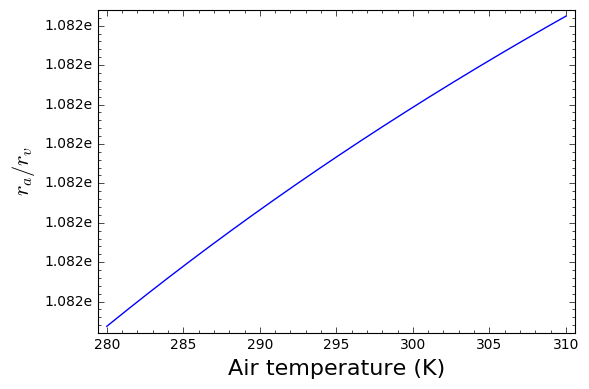

In [98]:
eq_ra_hc.show()
eq_rv_gbw.show()
(eq_ra_hc/eq_rv_gbw).subs(eq_gbw_hc).show()
plotfun = (eq_ra_hc/eq_rv_gbw).rhs().subs(eq_gbw_hc).subs(eq_Le).subs(eq_alphaa, eq_Dva)
print plotfun(T_a = 300)
P = plot(plotfun, (T_a, 280,310))
P.axes_labels(['Air temperature (K)', '$r_a/r_v$'])
P.show()

<p><span style="color: #ff0000;">$r_a/r_v$ is indeed  close to 1!</span></p>

In [99]:
eq_El_MU_corr

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

In [100]:
# Fig. 8 in Ball et al. 1988
vdict = cdict.copy()
vdict[a_s] = 1
vdict[L_l] = 0.07
vdict[P_a] = 101325
vdict[P_wa] = 20/1000*101325
vdict[R_s] = 400
vdict[Re_c] = 3000
vdict[T_a] = 273+30
vdict[T_w] = vdict[T_a]
vdict[g_sw] = 0.15/40
#vdict[g_sv] = 1e-6

vdict[v_w] = 1.
resdict = fun_SS(vdict)
for name1 in [T_l, E_l, H_l, R_ll, g_bw, g_tw]:
    print str(name1)+' = ' + str(resdict[name1])

vdict[P_was] = eq_Pwl.rhs()(T_l = T_a).subs(vdict) 
vdict[Delta_eTa] = eq_Deltaeta_T.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[nu_a] = eq_nua.rhs().subs(vdict)
vdict[Re] = eq_Re.rhs().subs(vdict)
vdict[Nu] = eq_Nu_forced_all.rhs().subs(vdict)
vdict[h_c] = eq_hc.rhs().subs(vdict) 

vdict[P_N2] = eq_PN2.rhs().subs(vdict)
vdict[P_O2] = eq_PO2.rhs().subs(vdict)
vdict[alpha_a] = eq_alphaa.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[D_va] = eq_Dva.rhs().subs(vdict)
vdict[Le] = eq_Le.rhs().subs(vdict)
vdict[rho_a] = eq_rhoa_Pwa_Ta.rhs().subs(vdict) 
vdict[g_bw] = eq_gbw_hc.rhs().subs(vdict)
vdict[g_tw] = eq_gtw.rhs().subs(vdict)
vdict[g_twmol] = eq_gtwmol_gtw_iso.rhs().subs(vdict)

vdict[R_ll] = 0
print 'Direct estimates: '
namesdict = [E_l, H_l]
vdict[E_l] = eq_El_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[H_l] = eq_Hl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
    
print eq_Tl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Tl_Delta1.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Tl_Delta2.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Rs_enbal.subs(vdict)

print 'Penman-stomata: '
namesdict = [E_l, H_l, T_l]
vdict[S] = eq_S_gbw_gsw.rhs().subs(vdict)
vdict[f_u] = eq_fu_gbw.rhs().subs(vdict)
vdict[gamma_v] = eq_gammav_as.rhs().subs(vdict)
vdict[E_l] = eq_El_P52.rhs().subs(vdict)
vdict[H_l] = eq_Hl_P52.rhs().subs(vdict)
vdict[T_l] = eq_Tl_P52.rhs().subs(vdict)
for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
    
print eq_Rs_enbal.subs(vdict)

print 'PM-equation: '
namesdict = [E_l, H_l]
vdict[r_s] = 1/vdict[g_sw]
vdict[r_a] = eq_ra_hc.rhs().subs(vdict)
vdict[gamma_v] = eq_gammav_MU.rhs().subs(vdict)
vdict[epsilon] = eq_epsilon.rhs().subs(vdict)
vdict[E_l] = eq_El_PM2.rhs().subs(vdict)
vdict[H_l] = (R_s - R_ll - E_l).subs(vdict)

for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
    
print eq_Rs_enbal.subs(vdict)

print 'MU-equation: '
namesdict = [E_l, H_l]
vdict[n_MU] = (a_sh/a_s).subs(vdict)
vdict[E_l] = eq_El_MU2.rhs().subs(vdict)
vdict[H_l] = (R_s - R_ll - E_l).subs(vdict)

for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
    
print eq_Rs_enbal.subs(vdict)

print 'Corrected MU-equation: '
namesdict = [E_l, H_l]
vdict[E_l] = eq_El_MU_corr.rhs().subs(vdict)
vdict[H_l] = (R_s - R_ll - E_l).subs(vdict)

for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
    
print eq_Rs_enbal.subs(vdict)

T_l = 308.321395271
E_l = 180.542235053941
H_l = 150.521099595469
R_ll = 68.9366653505872
g_bw = 0.0131620455576424
g_tw = 0.00291849206962754
Direct estimates: 
E_l = 198.222104889662
H_l = 201.777895110338
T_l == 310.133484539870
T_l == 310.133484539870
T_l == 309.093414355984
400 == 400.000000000000
Penman-stomata: 
E_l = 198.222104889662
H_l = 201.777895110338
T_l = 310.133484539870
400 == 400.000000000000
PM-equation: 
E_l = 241.448619283973
H_l = 158.551380716027
400 == 400.000000000000
MU-equation: 
E_l = 156.668183937778
H_l = 243.331816062222
400 == 400.000000000000
Corrected MU-equation: 
E_l = 195.741933442269
H_l = 204.258066557731
400 == 400.000000000000


<p><span style="color: #ff0000;">Penman-stomata gives identical results to the general solutions. </span></p>
<p><span style="color: #ff0000;">PM-equation greatly over-estimates $E_l$.</span></p>
<p><span style="color: #ff0000;">MU-equation greatly under-estimates $E_l$. </span></p>

## Analytical solution including longwave balance
The above analytical solutions eliminated the non-linearity problem of the saturation vapour pressure curve, but they did not take into account that the longwave component of the leaf energy balance ($R_{ll}$) also depends on leaf temperature, as expressed in Eq. {eq_Rll}. Therefore, the above analytical equations are commonly used in conjunction with fixed value of $R_{ll}$, either taken from observations or the assumption that $R_{ll}=0$. Here we will replace the non-linear Eq. {eq_Rll} by its tangent at $T_l = T_a$, which is given by:
##### {eq_Rll_tang}
\begin{equation}
R_{ll} = 4 a_{sh} \epsilon_l \sigma T_a^3 T_l - a_{sh} \epsilon_l \sigma (T_w^4 + 3 T_a^4)
\end{equation}
This introduces a bias of less than -20~W~m$^{-2}$ in the calculation of $R_{ll}$ for leaf temperatures $\pm 20$ K of air temperture, compared to Eq. {eq_Rll} (see Fig. {fig:Rll_lin}.



We can now use a similar procedure as in Section {sec:Penman_general}, but this time aimed at eliminating $P_{wl}$ using the Penman assumption, rather than eliminating $T_l$. We first eliminate $c_E$ from Eq. {eq_El_cE} by introducing Eq. {eq_gammav_cE}, then insert the Penman assumption (Eq. {eq_Penman_ass}) to eliminate $P_{wl}$ and obtain:
##### {eq_El_Tl}
\begin{equation}
E_l = \frac{c_H \left(\Delta_{eTa} (T_l - T_a) + P_{was} - P_{wa} \right)}{\gamma_v}
\end{equation}
We can now insert the linearised Eq. {eq_Rll_tang}, Eq. {eq_El_Tl} and Eq. {eq_Hl_cH} into the energy balance equation (Eq. {eq_Rs_enbal}) and solve for $T_l$ to obtain:
##### {eq_Tl_Delta_Rlin}
\begin{equation}
T_l = \frac{R_s + c_H T_a + c_E \left(\Delta_{eTa} T_a + P_{wa} - P_{was} \right) + a_{sh} \epsilon_l \sigma \left(3 T_a^4 + T_w^4 \right)}
{c_H + \Delta_{eTa} + 4 a_{sh} \epsilon_l \sigma T_a^3}
\end{equation}
Eq. {eq_Tl_Delta_Rlin} can be re-inserted into Eqs. {eq_Hl_cH}, {eq_El_Tl} and {eq_Rll_tang} to obtain analytical expressions for $H_l$, $E_l$ and $R_{ll}$ respectively, which satisfy the energy balance (Eq. {eq_Rs_enbal}). Alternatively, the value of $T_l$ obtained from Eq. {eq_Tl_Delta_Rlin} for specific conditions could be used to calculate any of the energy balance components using the fundamental equations described in Fig. {fig:flow_enbalance}. In this case, bias in $T_l$ due to simplifying assumptions included in the derivation of Eq. {eq_Tl_Delta_Rlin} would lead to a mismatch in the leaf energy balance.

In [101]:
# Linearised R_ll
var('T1 Rll1 dRlldT')
dRlldT = diff(eq_Rll.rhs(), T_l)
print dRlldT
soln = solve(dRlldT(T_l = T1)*T1 + Rll1 == eq_Rll.rhs()(T_l = T1), Rll1)
print soln
# Tangent of R_ll at T1
eq_Rll_tang = R_ll == (dRlldT(T_l = T1)*T_l + soln[0].rhs())(T1 = T_a).simplify_full()
eq_Rll_tang.show()
latex(eq_Rll_tang)

4*T_l^3*a_sh*epsilon_l*sigm
[
Rll1 == -3*T1^4*a_sh*epsilon_l*sigm - T_w^4*a_sh*epsilon_l*sigm
]


R_ll == -(3*T_a^4 - 4*T_a^3*T_l + T_w^4)*a_sh*epsilon_l*sigm

{R_{ll}} = -{\left(3 \, T_{a}^{4} - 4 \, T_{a}^{3} T_{l} + T_{w}^{4}\right)} {a_{sh}} \epsilon_{l} {\sigma}

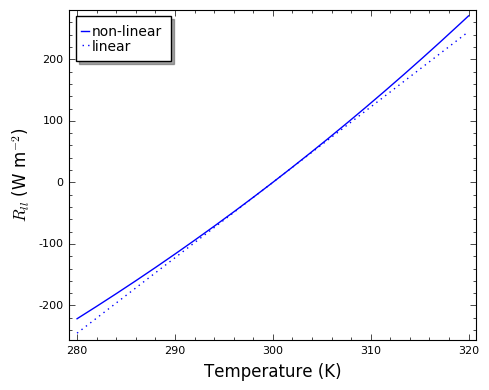

In [102]:
vdict = cdict.copy()
vdict[T_w] = 300
vdict[T_a] = 300
P = plot((eq_Rll.rhs().subs(vdict)), (T_l, 280,320), axes = False, frame = True, legend_label = 'non-linear' )
P += plot(eq_Rll_tang.rhs().subs(vdict), (T_l, 280,320), linestyle = ':', legend_label = 'linear')
P.axes_labels(['Temperature (K)', '$R_{ll}$ (W m$^{-2}$)'])

P.save(filename='/home/sschyman/Documents/papers/leaf-windtunnel/figures/Rll_lin.pdf', figsize=[5,4],legend_font_size=10, fontsize=8)
P.show(figsize=[5,4],legend_font_size=10, fontsize=8)

In [103]:
# Analtyical solution: keeping T_l, but eliminating P_wl and using eq_Rll_tang
eq_El_cE.show()
eq_Hl_cH.show()
eq_Rll_tang.show()
eq_gammav_cE.show()
eq_Penman_ass.show()

# Eliminating c_E
eq_El_gammav = solve([eq_El_cE, eq_gammav_cE], E_l, c_E)[0][0]
print units_check(eq_El_gammav)

# Eliminating P_wl
eq_El_Tl = solve([eq_El_gammav, eq_Penman_ass], E_l, P_wl)[0][0]
print units_check(eq_El_Tl)

# Solving for E_l, H_l and T_l
soln = solve([eq_El_Tl, eq_Hl_cH, eq_Rs_enbal.subs(eq_Rll_tang(T1 = T_a))], E_l, H_l, T_l)
[eq_El_Delta_Rlllin, eq_Hl_Delta_Rlllin, eq_Tl_Delta_Rlllin] = [eq1.subs(eq_gammav_cE).simplify_full() for eq1 in flatten(soln)]
for eq1 in [eq_El_Delta_Rlllin, eq_Hl_Delta_Rlllin, eq_Tl_Delta_Rlllin]:
    print units_check(eq1)

E_l == -(P_wa - P_wl)*c_E

H_l == -(T_a - T_l)*c_H

R_ll == -(3*T_a^4 - 4*T_a^3*T_l + T_w^4)*a_sh*epsilon_l*sigm

gamma_v == c_H/c_E

Delta_eTa == (P_was - P_wl)/(T_a - T_l)

E_l == -(P_wa*c_H - P_wl*c_H)/gamma_v

kilogram/second^3 == kilogram/second^3


E_l == -(Delta_eTa*T_a - Delta_eTa*T_l + P_wa - P_was)*c_H/gamma_v

kilogram/second^3 == kilogram/second^3


E_l == -((Delta_eTa*T_a^4 - Delta_eTa*T_w^4 + 4*(P_wa - P_was)*T_a^3)*a_sh*c_E*epsilon_l*sigm - Delta_eTa*R_s*c_E + (P_wa - P_was)*c_E*c_H)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3


H_l == -((T_a^4 - T_w^4)*a_sh*c_H*epsilon_l*sigm - ((P_wa - P_was)*c_E + R_s)*c_H)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3


T_l == ((3*T_a^4 + T_w^4)*a_sh*epsilon_l*sigm + (Delta_eTa*T_a + P_wa - P_was)*c_E + T_a*c_H + R_s)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

kelvin == kelvin


In [104]:
soln = solve(eq_Rs_enbal.subs(eq_Rll_tang, eq_El_Tl, eq_Hl_cH), T_l)
eq_Tl_Delta_Rlllin = soln[0].subs(eq_gammav_cE).simplify_full()
units_check(eq_Tl_Delta_Rlllin)

T_l == ((3*T_a^4 + T_w^4)*a_sh*epsilon_l*sigm + (Delta_eTa*T_a + P_wa - P_was)*c_E + T_a*c_H + R_s)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

kelvin == kelvin

In [105]:
eq_El_Tl.subs(eq_Tl_Delta_Rlllin).subs(eq_gammav_cE).simplify_full().show()
eq_El.subs(eq_Elmol).subs(eq_Cwa, eq_Cwl).subs(eq_Tl_Delta_Rlllin).simplify_full().show()
eq_Hl_cH.subs(eq_Tl_Delta_Rlllin).simplify_full().show()
eq_Rll_tang.subs(eq_Tl_Delta_Rlllin).simplify_full().show()

E_l == -((Delta_eTa*T_a^4 - Delta_eTa*T_w^4 + 4*(P_wa - P_was)*T_a^3)*a_sh*c_E*epsilon_l*sigm - Delta_eTa*R_s*c_E + (P_wa - P_was)*c_E*c_H)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

E_l == -((M_w*P_wa*T_w^4 + (3*M_w*P_wa - 4*M_w*P_wl)*T_a^4)*a_sh*epsilon_l*g_tw*lambda_E*sigm + (M_w*P_wa*R_s + (M_w*P_wa - M_w*P_wl)*T_a*c_H + (M_w*P_wa^2 - M_w*P_wa*P_was + (Delta_eTa*M_w*P_wa - Delta_eTa*M_w*P_wl)*T_a)*c_E)*g_tw*lambda_E)/(R_mol*T_a^2*c_H + (3*R_mol*T_a^5 + R_mol*T_a*T_w^4)*a_sh*epsilon_l*sigm + R_mol*R_s*T_a + (Delta_eTa*R_mol*T_a^2 + (P_wa - P_was)*R_mol*T_a)*c_E)

H_l == -((T_a^4 - T_w^4)*a_sh*c_H*epsilon_l*sigm - ((P_wa - P_was)*c_E + R_s)*c_H)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

R_ll == (4*R_s*T_a^3*a_sh + (Delta_eTa*T_a^4 - Delta_eTa*T_w^4 + 4*(P_wa - P_was)*T_a^3)*a_sh*c_E + (T_a^4 - T_w^4)*a_sh*c_H)*epsilon_l*sigm/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

In [106]:
# Fig. 8 in Ball et al. 1988
vdict = cdict.copy()
vdict[a_s] = 1
vdict[L_l] = 0.07
vdict[P_a] = 101325
vdict[P_wa] = 20/1000*101325
vdict[R_s] = 400
vdict[Re_c] = 3000
vdict[T_a] = 273+30
vdict[T_w] = vdict[T_a]
vdict[g_sw] = 0.15/40
#vdict[g_sv] = 1e-6

vdict[v_w] = 1.
resdict = fun_SS(vdict)
for name1 in [T_l, E_l, H_l, R_ll, g_bw, g_tw]:
    print str(name1)+' = ' + str(resdict[name1])

vdict[P_was] = eq_Pwl.rhs()(T_l = T_a).subs(vdict) 
vdict[Delta_eTa] = eq_Deltaeta_T.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[nu_a] = eq_nua.rhs().subs(vdict)
vdict[Re] = eq_Re.rhs().subs(vdict)
vdict[Nu] = eq_Nu_forced_all.rhs().subs(vdict)
vdict[h_c] = eq_hc.rhs().subs(vdict) 

vdict[P_N2] = eq_PN2.rhs().subs(vdict)
vdict[P_O2] = eq_PO2.rhs().subs(vdict)
vdict[alpha_a] = eq_alphaa.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[D_va] = eq_Dva.rhs().subs(vdict)
vdict[Le] = eq_Le.rhs().subs(vdict)
vdict[rho_a] = eq_rhoa_Pwa_Ta.rhs().subs(vdict) 
vdict[g_bw] = eq_gbw_hc.rhs().subs(vdict)
vdict[g_tw] = eq_gtw.rhs().subs(vdict)
vdict[g_twmol] = eq_gtwmol_gtw_iso.rhs().subs(vdict)


print 'Direct estimates: '
namesdict = [E_l, H_l, T_l, R_ll]
vdict[E_l] = eq_El_Delta_Rlllin.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[H_l] = eq_Hl_Delta_Rlllin.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[T_l] = eq_Tl_Delta_Rlllin.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[R_ll] = eq_Rll_tang.rhs().subs(vdict)

for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
    
print eq_Tl_Delta.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Tl_Delta1.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Tl_Delta2.subs(eq_ce_conv, eq_ch_hc).subs(vdict)
print eq_Rs_enbal.subs(vdict)

print 'Using T_l from eq_Tl_Delta_Rlllin.rhs() only to calculate R_ll: '
namesdict = [T_l, R_ll, E_l, H_l]
vdict[R_ll] = 0
vdict[T_l] = eq_Tl_Delta_Rlllin.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[R_ll] = eq_Rll.rhs().subs(vdict)
vdict[E_l] = eq_El_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)
vdict[H_l] = eq_Hl_Delta.rhs().subs(eq_ce_conv, eq_ch_hc).subs(vdict)

for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
print eq_Rs_enbal.subs(vdict)

vdict[R_ll] = 0
print 'Penman-stomata: '
namesdict = [E_l, H_l, T_l]
vdict[S] = eq_S_gbw_gsw.rhs().subs(vdict)
vdict[f_u] = eq_fu_gbw.rhs().subs(vdict)
vdict[gamma_v] = eq_gammav_as.rhs().subs(vdict)
vdict[E_l] = eq_El_P52.rhs().subs(vdict)
vdict[H_l] = eq_Hl_P52.rhs().subs(vdict)
vdict[T_l] = eq_Tl_P52.rhs().subs(vdict)
for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
    
print eq_Rs_enbal.subs(vdict)

print 'PM-equation: '
namesdict = [E_l, H_l]
vdict[r_s] = 1/vdict[g_sw]
vdict[r_a] = eq_ra_hc.rhs().subs(vdict)
vdict[gamma_v] = eq_gammav_MU.rhs().subs(vdict)
vdict[epsilon] = eq_epsilon.rhs().subs(vdict)
vdict[E_l] = eq_El_PM2.rhs().subs(vdict)
vdict[H_l] = (R_s - R_ll - E_l).subs(vdict)

for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
    
print eq_Rs_enbal.subs(vdict)

print 'MU-equation: '
namesdict = [E_l, H_l]
vdict[n_MU] = (a_sh/a_s).subs(vdict)
vdict[E_l] = eq_El_MU2.rhs().subs(vdict)
vdict[H_l] = (R_s - R_ll - E_l).subs(vdict)

for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
    
print eq_Rs_enbal.subs(vdict)

print 'Corrected MU-equation: '
namesdict = [E_l, H_l]
vdict[E_l] = eq_El_MU_corr.rhs().subs(vdict)
vdict[H_l] = (R_s - R_ll - E_l).subs(vdict)

for name1 in namesdict:
    print str(name1)+' = ' + str(vdict[name1])
    
print eq_Rs_enbal.subs(vdict)

T_l = 308.321395271
E_l = 180.542235053941
H_l = 150.521099595469
R_ll = 68.9366653505872
g_bw = 0.0131620455576424
g_tw = 0.00291849206962754
Direct estimates: 
E_l = 177.353891811830
H_l = 153.963492920038
T_l = 308.443094724766
R_ll = 68.6826152681328
308.443094724766 == 308.443094724766
308.443094724766 == 308.443094724766
308.443094724766 == 307.807922524751
400 == 400.000000000001
Using T_l from eq_Tl_Delta_Rlllin.rhs() only to calculate R_ll: 
T_l = 308.443094724766
R_ll = 70.5556017512520
E_l = 176.784812127414
H_l = 152.659586121334
400 == 400.000000000000
Penman-stomata: 
E_l = 198.222104889662
H_l = 201.777895110338
T_l = 310.133484539870
400 == 400.000000000000
PM-equation: 
E_l = 241.448619283973
H_l = 158.551380716027
400 == 400.000000000000
MU-equation: 
E_l = 156.668183937778
H_l = 243.331816062222
400 == 400.000000000000
Corrected MU-equation: 
E_l = 195.741933442269
H_l = 204.258066557731
400 == 400.000000000000


<p><span style="color: #ff0000;">The use of the linearised R_ll improves accurcay significantly compared to eq_Tl_Delta!</span></p>

In [107]:
save_session('E_PM_eqs')